In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
df_train = pd.read_json('/content/drive/My Drive/train.jsonl', lines=True)

df_train.head()

,category,headline,authors,link,short_description,date
0,WELLNESS,Pain's Long Reach and Powerful Grip,"Jim Moret, Contributor\nChief Correspondent, I...",https://www.huffingtonpost.com/entry/dealing-w...,Ask our son about pain. He will tell you about...,2013-09-09
1,POLITICS,Runaway Trump Train Picks Up Speed As Aides Ca...,Howard Fineman and S.V. Date,https://www.huffingtonpost.com/entry/runaway-t...,"Paul Manafort isn’t quitting, but is said to b...",2016-08-03
2,PARENTS,Why Parental Praise Doesn't Create Narcissists...,"Dr. Craig Malkin, ContributorAuthor, Clinical ...",https://www.huffingtonpost.com/entry/why-paren...,Go ahead and tell your kids they're special as...,2015-05-14
3,BUSINESS,A New Deal For Farmers - How Founding Farmers ...,"AJ Agrawal, Contributor",https://www.huffingtonpost.com/entry/a-new-dea...,,2016-09-18
4,POLITICS,The GOP Targets Entitlements,"Joe Peyronnin, ContributorHofstra Journalism P...",https://www.huffingtonpost.com/entry/the-gop-t...,House and Senate Republicans are committed to ...,2017-12-08


In [14]:
df_train['category_id'] = df_train['category'].factorize()[0]

### first 10 entries of category_id

In [15]:
df_train['category_id'][0:10]

0    0
1    1
2    2
3    3
4    1
5    4
6    2
7    5
8    0
9    6
Name: category_id, dtype: int64

### new df "category_id_df", only with unique categories

In [16]:
category_id_df = df_train[['category', 'category_id']].drop_duplicates().sort_values('category_id')

In [17]:
category_id_df

,category,category_id
0,WELLNESS,0
1,POLITICS,1
2,PARENTS,2
3,BUSINESS,3
5,WORLDPOST,4
7,HOME & LIVING,5
9,HEALTHY LIVING,6
11,CRIME,7
13,QUEER VOICES,8
14,SPORTS,9


### Dict to convert category names into category_ids and vice-versa

In [18]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [19]:
id_to_category

{0: 'WELLNESS',
 1: 'POLITICS',
 2: 'PARENTS',
 3: 'BUSINESS',
 4: 'WORLDPOST',
 5: 'HOME & LIVING',
 6: 'HEALTHY LIVING',
 7: 'CRIME',
 8: 'QUEER VOICES',
 9: 'SPORTS',
 10: 'STYLE & BEAUTY',
 11: 'WEDDINGS',
 12: 'IMPACT',
 13: 'FOOD & DRINK',
 14: 'COMEDY',
 15: 'PARENTING',
 16: 'ENTERTAINMENT',
 17: 'ENVIRONMENT',
 18: 'WORLD NEWS',
 19: 'COLLEGE',
 20: 'TECH',
 21: 'RELIGION',
 22: 'DIVORCE',
 23: 'THE WORLDPOST',
 24: 'WOMEN',
 25: 'MONEY',
 26: 'ARTS & CULTURE',
 27: 'BLACK VOICES',
 28: 'TRAVEL',
 29: 'GOOD NEWS',
 30: 'MEDIA',
 31: 'SCIENCE',
 32: 'WEIRD NEWS',
 33: 'ARTS',
 34: 'EDUCATION',
 35: 'LATINO VOICES',
 36: 'TASTE',
 37: 'GREEN',
 38: 'STYLE',
 39: 'U.S. NEWS',
 40: 'CULTURE & ARTS',
 41: 'FIFTY'}

In [20]:
df_train.sample(5, random_state=0)

,category,headline,authors,link,short_description,date,category_id
9394,POLITICS,The Evil That Guns Do,"Michael Winship, ContributorFormer senior writ...",https://www.huffingtonpost.com/entry/the-evil-...,Don't be fooled by the NRA's post-Las Vegas rh...,2017-10-10,1
898,WOMEN,There Is Still Work Ahead For Workplace Equity,"Linda A. Seabrook, ContributorGeneral Counsel,...",https://www.huffingtonpost.com/entry/there-is-...,"Eight years ago today, landmark legislation wa...",2017-01-29,24
2398,QUEER VOICES,"After Being With My Partner For 28 Years, I'm ...","David R. Morse, ContributorPresident & CEO, Ne...",https://www.huffingtonpost.com/entry/im-gettin...,"""It was a stunning achievement, something near...",2017-11-02,8
5906,HOME & LIVING,You're Wasting Thousands Of Dollars If You're ...,"Joseph Polverari, Contributor\nGeneral Manager...",https://www.huffingtonpost.com/entry/youre-was...,Whether you're unsure if you can even afford t...,2014-04-08,5
2343,ENTERTAINMENT,The Most Tear-Worthy Moments From 'This Is Us'...,Lauren Moraski,https://www.huffingtonpost.com/entry/this-is-u...,We already miss the Pearsons.,2017-03-28,16


In [21]:
df_train.groupby('category').category_id.count()

category
ARTS                56
ARTS & CULTURE      61
BLACK VOICES       247
BUSINESS           273
COLLEGE             41
COMEDY             251
CRIME              169
CULTURE & ARTS      51
DIVORCE            161
EDUCATION           50
ENTERTAINMENT      852
ENVIRONMENT         64
FIFTY               75
FOOD & DRINK       324
GOOD NEWS           63
GREEN              108
HEALTHY LIVING     300
HOME & LIVING      185
IMPACT             177
LATINO VOICES       46
MEDIA              136
MONEY               78
PARENTING          433
PARENTS            190
POLITICS          1687
QUEER VOICES       320
RELIGION           128
SCIENCE             99
SPORTS             237
STYLE              104
STYLE & BEAUTY     447
TASTE              112
TECH               106
THE WORLDPOST      162
TRAVEL             460
U.S. NEWS           72
WEDDINGS           181
WEIRD NEWS         111
WELLNESS           923
WOMEN              176
WORLD NEWS         165
WORLDPOST          119
Name: category_id, dtype:

<Axes: xlabel='category'>

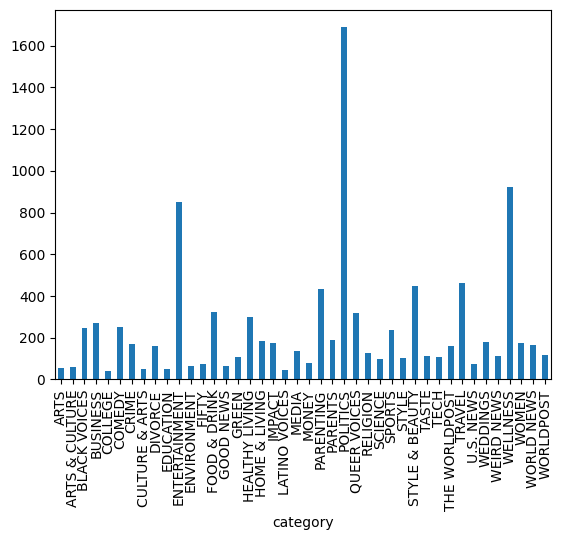

In [22]:
df_train.groupby('category').category_id.count().plot.bar(ylim=0)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_train['headline']).toarray()
labels = df_train['category_id']

In [24]:
features.shape

(10000, 3229)

In [25]:
category_to_id.items()

dict_items([('WELLNESS', 0), ('POLITICS', 1), ('PARENTS', 2), ('BUSINESS', 3), ('WORLDPOST', 4), ('HOME & LIVING', 5), ('HEALTHY LIVING', 6), ('CRIME', 7), ('QUEER VOICES', 8), ('SPORTS', 9), ('STYLE & BEAUTY', 10), ('WEDDINGS', 11), ('IMPACT', 12), ('FOOD & DRINK', 13), ('COMEDY', 14), ('PARENTING', 15), ('ENTERTAINMENT', 16), ('ENVIRONMENT', 17), ('WORLD NEWS', 18), ('COLLEGE', 19), ('TECH', 20), ('RELIGION', 21), ('DIVORCE', 22), ('THE WORLDPOST', 23), ('WOMEN', 24), ('MONEY', 25), ('ARTS & CULTURE', 26), ('BLACK VOICES', 27), ('TRAVEL', 28), ('GOOD NEWS', 29), ('MEDIA', 30), ('SCIENCE', 31), ('WEIRD NEWS', 32), ('ARTS', 33), ('EDUCATION', 34), ('LATINO VOICES', 35), ('TASTE', 36), ('GREEN', 37), ('STYLE', 38), ('U.S. NEWS', 39), ('CULTURE & ARTS', 40), ('FIFTY', 41)])

In [26]:
sorted(category_to_id.items())

[('ARTS', 33),
 ('ARTS & CULTURE', 26),
 ('BLACK VOICES', 27),
 ('BUSINESS', 3),
 ('COLLEGE', 19),
 ('COMEDY', 14),
 ('CRIME', 7),
 ('CULTURE & ARTS', 40),
 ('DIVORCE', 22),
 ('EDUCATION', 34),
 ('ENTERTAINMENT', 16),
 ('ENVIRONMENT', 17),
 ('FIFTY', 41),
 ('FOOD & DRINK', 13),
 ('GOOD NEWS', 29),
 ('GREEN', 37),
 ('HEALTHY LIVING', 6),
 ('HOME & LIVING', 5),
 ('IMPACT', 12),
 ('LATINO VOICES', 35),
 ('MEDIA', 30),
 ('MONEY', 25),
 ('PARENTING', 15),
 ('PARENTS', 2),
 ('POLITICS', 1),
 ('QUEER VOICES', 8),
 ('RELIGION', 21),
 ('SCIENCE', 31),
 ('SPORTS', 9),
 ('STYLE', 38),
 ('STYLE & BEAUTY', 10),
 ('TASTE', 36),
 ('TECH', 20),
 ('THE WORLDPOST', 23),
 ('TRAVEL', 28),
 ('U.S. NEWS', 39),
 ('WEDDINGS', 11),
 ('WEIRD NEWS', 32),
 ('WELLNESS', 0),
 ('WOMEN', 24),
 ('WORLD NEWS', 18),
 ('WORLDPOST', 4)]

### chi-square analysis: corelation between features (importantce of words) and labels (news category)

In [27]:
from sklearn.feature_selection import chi2

N = 10

for Category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Category))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


# 'ARTS':
  . Most correlated unigrams:
       . beware
       . collaboration
       . artist
       . william
       . broadway
       . door
       . gifs
       . collection
       . art
       . gallery
  . Most correlated bigrams:
       . health care
       . supreme court
       . year old
       . white house
       . hillary clinton
       . donald trump
       . new york
       . world cup
       . new orleans
       . middle east
# 'ARTS & CULTURE':
  . Most correlated unigrams:
       . van
       . books
       . reality
       . potter
       . slam
       . capitol
       . feminist
       . actors
       . broadway
       . genius
  . Most correlated bigrams:
       . donald trump
       . mike pence
       . las vegas
       . years ago
       . travel ban
       . gop debate
       . 30 years
       . trump travel
       . bruce springsteen
       . harry potter
# 'BLACK VOICES':
  . Most correlated unigrams:
       . atlanta
       . biopic
       . spread
       . 

In [28]:
features_chi2

(array([0.12264962, 0.2066352 , 0.02989434, ..., 0.04952986, 0.03045369,
        0.03470517]),
 array([0.72617834, 0.64941758, 0.86273019, ..., 0.82388338, 0.86146478,
        0.8522148 ]))

In [29]:
from sklearn.manifold import TSNE

SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])

In [32]:
my_id = 5
projected_features[(labels[indices] == my_id).values]

array([[ -70.10586   ,   60.9619    ],
       [ -14.207061  ,   26.898388  ],
       [  62.409782  ,   46.075924  ],
       [  84.195625  ,  -10.245682  ],
       [  -4.9317923 ,    3.3331277 ],
       [   1.0516225 ,   -2.5995033 ],
       [  31.383001  , -100.578     ],
       [  51.645     ,   16.635418  ],
       [ -90.77549   ,  -40.453938  ],
       [-101.15422   ,  -40.63915   ],
       [  16.793423  ,   52.403183  ],
       [   2.4856594 ,    7.9721336 ],
       [ -37.643795  ,   48.417797  ],
       [ -42.942543  ,  -53.731457  ],
       [   0.56840545,   76.87155   ],
       [  -4.933883  ,    3.3335304 ],
       [  -6.5999627 ,   -8.232592  ],
       [ -18.93162   ,   49.208744  ],
       [  15.479867  ,    8.965191  ],
       [  76.67587   ,  -59.99565   ],
       [  83.948364  ,    7.194814  ],
       [   4.8216963 ,    3.2777226 ],
       [  10.401898  ,  -14.596484  ],
       [ -92.47052   ,  -45.14028   ],
       [ -37.946613  ,   24.37468   ],
       [  81.34117   ,  -

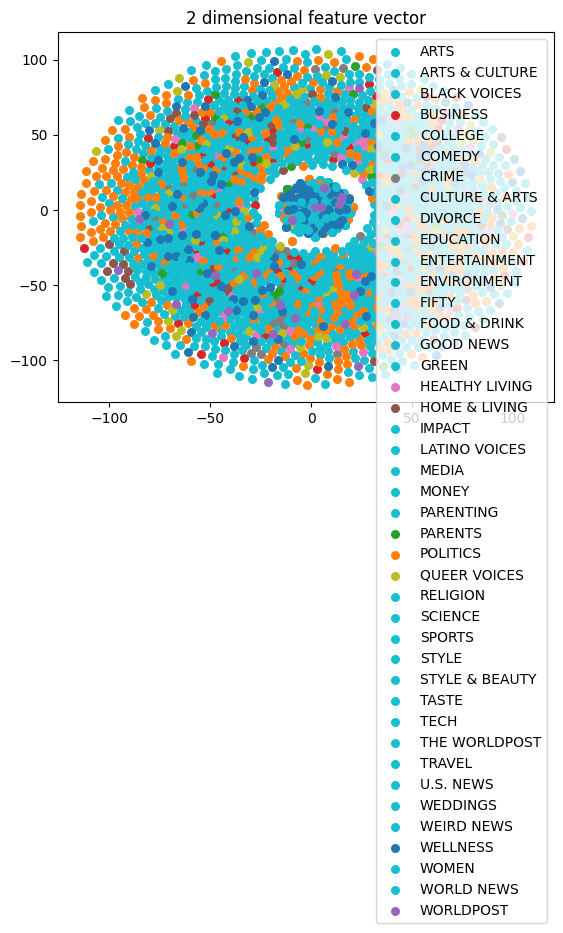

In [34]:
import matplotlib.pyplot as plt
import numpy as np

num_categories = len(category_to_id)
cmap = plt.get_cmap('tab10')

for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    # Calculate the color index based on the category ID
    color_index = category_id % num_categories
    plt.scatter(points[:, 0], points[:, 1], s=30, c=[cmap(color_index)], label=category)

plt.title("2 dimensional feature vector")
plt.legend()
plt.show()


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [36]:
CV = 5

cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

In [37]:
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring = 'accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [38]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

<ipython-input-39-606c2eb606d6>:4: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='model_name', y='accuracy', data=cv_df,


<Axes: xlabel='model_name', ylabel='accuracy'>

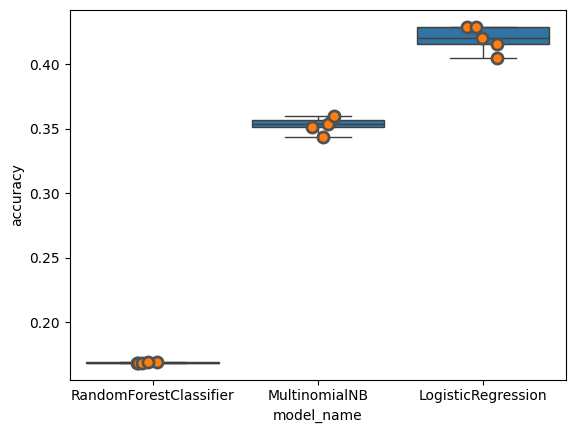

In [39]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [40]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.4197
MultinomialNB             0.3529
RandomForestClassifier    0.1687
Name: accuracy, dtype: float64

In [41]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.1685
1,RandomForestClassifier,1,0.1685
2,RandomForestClassifier,2,0.1685
3,RandomForestClassifier,3,0.1690
4,RandomForestClassifier,4,0.1690
5,MultinomialNB,0,0.3565
6,MultinomialNB,1,0.3535
7,MultinomialNB,2,0.3510
8,MultinomialNB,3,0.3600
9,MultinomialNB,4,0.3435


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev, indices_train, indices_dev = train_test_split(features, labels, df_train.index, test_size=0.33, random_state=0)

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df_train.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['headline'])
      print('')

'POLITICS' predicted as 'WELLNESS' : 15 examples.


9862     Happy Birthday FLOTUS! Here's Why You're Awesome
7857    We're This Close To Getting A Permanent Health...
9964                         Igniting Change that Matters
1533    If Fourth-Year Presidents Shouldn't Do Things,...
3034    Sheriff In Heart Of Ohio's Opioid Epidemic Ref...
4258    Socialism, Intersectionality And The Myth Of T...
4197    A Handy Dandy Guide To The Ethics And Etiquett...
6978    Schism and Lack of Leadership in Washington Be...
4516    Financing the Flames -- NIF Parade Fracas Push...
9432    What Happens To My Mother If Graham-Cassidy Pa...
4265    HUFFPOLLSTER: What You Need To Know About Brex...
4805    People Of Color Bear The Brunt Of Fast-Food Ex...
3519    Why Hogan Is Better for Blue Maryland Than Bro...
7042                                A Path Out Of Trouble
8027            It's Here: CBPP's Top Graphs Of The Year!
Name: headline, dtype: object


'PARENTS' predicted as 'WELLNESS' : 5 examples.


3749    Netflix Is Tricking Kids Into Going To Sleep E...
4668    How to Be a Good Father: Lessons for Father's Day
3188       Why We Switched Hospitals Mid-Cancer Treatment
6479                          The Grounds Behind Her Eyes
8625    Frustrated Dad Shows The Complexity Of Common ...
Name: headline, dtype: object


'BUSINESS' predicted as 'WELLNESS' : 18 examples.


3977    Organization Matters: Organize Your Life and Y...
3689                   Rethinking Values in the Workplace
6101    Listen to Your Brain to Sense a Market Correction
5326    Here's How Subway Plans To Prove Its Footlongs...
8445             3 Ways You Can Be a More Positive Leader
8425                   25 European Banks Fail Stress Test
9051                   The Aha Behind Leading Aha Moments
9064    The 3 Least Intimidating Yet Effective Ways to...
7005    Is Job Hunting During the Holidays a Waste of ...
8763    A Life-Changing, True Story Reveals the Secret...
5983                             Ringing in Good Behavior
8101    4 Things Your Dog Can Teach You About Customer...
9734            Five Lessons of Being a Multi-Millionaire
7134            6 Tips for Indian Managers New to America
7680    7 Steps to Stay Financially Fit in 2015 and Be...
6228    Eastern Wisdom Is Changing Western Corporate P...
3498                The Downside To Workplace Flexibility
217           


'WORLDPOST' predicted as 'WELLNESS' : 4 examples.


7982    Officials: Afghan Taliban Ready For Open Peace...
3261    What's Behind the Brain Drain in the Former So...
866                  "When I Grow Up, I Want to be Cuban"
1168    How to Achieve Israel's Stated Goal of Long-Te...
Name: headline, dtype: object


'HOME & LIVING' predicted as 'WELLNESS' : 8 examples.


1201            The Best Basics: Good, Cheap Duvet Covers
915     Halloween Decorations: Surreal Magnifying Glas...
9391    Buying And Appraising Silver: An Expert Shares...
5579           Eye-Catching Colors For Your Kitchen Floor
1852           Getting Your Outdoor Area Ready for Spring
9833             Magazine Storage...Using A Juice Carton!
7417    How Mowing The Lawn Can Boost Your Mood, Help ...
2065        Six Expert Tricks For Decorating Small Spaces
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'WELLNESS' : 63 examples.


6759    Whole Foods Recalls Maytag Blue Cheese Due To ...
9715    There Could Be A Link Between This Yeast Infec...
377          The 6 Golden Rules Of A Healthy Grocery Cart
6488                              Less Fear, More Courage
9            5 Things To Spring Clean Besides Your Closet
                              ...                        
9165    Healthy Living Comics: Today, Time for Your An...
7442               How to Know When to Try Something Else
6676                                The Flip Side Of Fear
552     Here's How to Splurge on Thanksgiving Without ...
6938           So Your Diet Crashed and Burned. Now What?
Name: headline, Length: 63, dtype: object


'CRIME' predicted as 'WELLNESS' : 6 examples.


2021    Search For Missing 5-Year-Old Leads To Body In...
9952    DJ Played Snorting 'Peppa Pig' Theme To Cops; ...
8426    Bagged Heart Mysteriously Appears In Ohio Fiel...
9392    Kyron Horman Missing: Volunteers Search For Or...
8324          Woman Beats Cancer, Dies Falling From Horse
2761    'Goodfellas' Trial Shows How Good Luck Cracked...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'WELLNESS' : 17 examples.


4676                I Did It: Lunch With a Total Stranger
7457    Here's How Skipping One Meal Could Help Preven...
4254    A Day In The Life After You've Been Kicked Out...
994     No, I Don't Have a Dick Pic, and Here's Why My...
3456    UN Brings Ambassadors From 17 Nations To Broad...
1070    Video Captures That Horrible Feeling Of Waitin...
5855                   Treading Water In A Sea Of Anxiety
1928                                      The Living Room
8229    The Word "Cisgender": An Unlikely Semantic Rev...
8576    Life on the Funny Side: A Conversation With Ed...
1941    Challenging Dual Stereotypes: The Reality for ...
7894    How Larry Kramer's Normal Heart Thunders With ...
1022    World Health Organization Recommends PrEP: Pre...
5519    Madonna's 'Rebel Heart' Still Beats For Detroi...
3025           The Gender Identity Terms You Need To Know
8264          Making United in Anger: A History of ACT UP
9188        5 Lessons From the Normal Heart of Matt Bomer
Name: headline


'SPORTS' predicted as 'WELLNESS' : 8 examples.


4700                 SEC Sweeps NCAA Track & Field Titles
2543             Leveling the Playing Field, Without Fear
9275    This Is How The Human Face Reacts To Getting H...
1159    Cheating in Athletics: The Real Cost of (a Lac...
445     Weeping Federer Hails Emotional 20th Grand Sla...
7027    Yankees Affiliate: Timing Of Blue Lives Matter...
3160    Divisional Round Point Spreads: Patriots, Nine...
828     Beijing, Brazil, 7-1: Awareness Shift in Socce...
Name: headline, dtype: object


'STYLE & BEAUTY' predicted as 'WELLNESS' : 16 examples.


3646     Brooklyn Decker On Why She 'Wasn't A Good Model'
9345    Goal Get It: The Coolest Products and Tips to ...
4546     6 Ways To Take The Stress Out Of Online Shopping
692                     New Year's Eve: Smaller Is Better
5352    Bridal Gown Designer Sareh Nouri on Her Love o...
7455                 Style Pet Peeve: Bare Legs In Winter
9232    Sex: What He Really Wants (and Is Afraid to As...
519     Arianna Huffington On Her Skincare Regimen: 'I...
8710    The Unexpected Trending Nail Color That's Sure...
9696    Who To Follow On Pinterest: Anna Wintour, Pete...
1425    8 Ways Your Clothes Could Be Dangerous To Your...
9375    The Good Wives: Best-Dressed Political Wives i...
787                       9 Super Sweet Facts About Honey
3348    Why You Definitely Shouldn't Wear Makeup To Th...
5743                              A Color Palette Emerges
1122         Drugstore Beauty Products For Us Brown Girls
Name: headline, dtype: object


'WEDDINGS' predicted as 'WELLNESS' : 6 examples.


8204                      Real Love Is Only What You Give
2031    19 Ways To Highlight Your Engagement Ring With...
9910                   Barbie Dream Weddings Come to Life
2984                  5 Ways To Avoid Honeymoon Heartache
263                                            Resolution
2819    Should You Follow Your Nose -- Not Your Heart ...
Name: headline, dtype: object


'IMPACT' predicted as 'WELLNESS' : 10 examples.


2936                              Nepal: A Call to Action
9026    It’s Mildly Infectious And Treatable—Yet Patie...
8838         Renewables Driving the Energy Transformation
8070    This Project Is Committed To Reducing Food Was...
6394    Hunger Is Everywhere: Perspectives From a 30-H...
3043    Boston Marathon Survivor Donates Prosthetic To...
4126                 We Should Change The Meaning of PTSD
9602    The Secret of the Avatar Can Deepen Your Partn...
6082    Machines Don't Always Steal Our Jobs. Increasi...
9652           Four Women, One Life-Changing Intervention
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'WELLNESS' : 41 examples.


5350      8 Foods That Could Be Putting You In A Bad Mood
3725    Food Tattoos: A Few Of Our Favorites, From Pig...
6450    A Chef Gets Honest About Turkey Tips -- And Br...
5228                            Spring Saturday Cocktails
8046                              10 Game-Changing Snacks
9802    The Magic That Molecular Gastronomists Don't D...
2113    Simple Weeknight Meal: Pot Roasted Pork Loin W...
6552              Eat Your Way Out Of The Winter Doldrums
2476                               A Better Shade of Kale
9172     Tim's Place, Albuquerque: Good Food, Good People
4687    Blue Ice Vodka's Certification As 'Gluten Free...
2578                For Love Of the 'Que: Competitive BBQ
1718    6 Ways to Drink Like Don Draper for the Mad Me...
1529    The End of an Affair: Why I Broke Up With My F...
2847    Whole Foods Didn't Have Much Choice on GMO Lab...
5885                         A Dessert Worthy of the Gods
8463                    Passover Rolls: Unleavened Treats
4719          


'COMEDY' predicted as 'WELLNESS' : 10 examples.


9083    Warning: Population of Content Marketing Exper...
2097    'Honest' Juice Cleanse Ad Will Eat Away At You...
2539    Dog Fails Training Lesson In The Best Way (VIDEO)
8136    A Pragmatic Response to 'A Field Guide to' Idi...
9509    These Music Videos Are The Only Thing Alex Jon...
2994    'To The People Saying I'm A Robot Who Can't Lo...
6165    The Pathetic Tinder Profile of a Desperate 30-...
1252                 Study Finds Conservatives Are Morons
8610    10 Signs You're Probably Reading This Article ...
6069                                Difference of Opinion
Name: headline, dtype: object


'PARENTING' predicted as 'WELLNESS' : 40 examples.


4346    6 Ways You Can Have a Meaningful Holiday, No M...
8940    3-Year-Old Sings And Dances Her Heart Out To C...
3683        The 5 WORST Things About Going Back to School
5868       Healthy, Budget-Friendly Menu Options for Kids
9517        How to Put a Toddler to Bed in 100 Easy Steps
1654    How to Cope When You Don't Fit into Pre-Pregna...
8412    How Becoming A Mother Changed My Mind About My...
8213    What Is Reading? It's About Time We Figured It...
704     Why Elisabeth Badinter Is Wrong, And Motherhoo...
572                     Questions Every Parent Should Ask
1669    Do Vaccines Cause Autism? CDC Finds No Link Be...
23         10 Tech Etiquette Lessons For Teens And Tweens
2060                     Building Better Digital Citizens
5470     Is It Wrong to Market Even Healthy Food to Kids?
5690    7 Steps to Raising Stellar, Successful, Self-S...
9626       Science for the Summer! Part Two: Explorations
1585                        Donna's Cancer Story: The End
5372    Breast


'ENTERTAINMENT' predicted as 'WELLNESS' : 19 examples.


9946    Emilia Clarke Should Never Try To Imitate Chew...
671           FX's Television Show Legit Salutes Veterans
4665    Jean-Claude Van Damme Explains Why His Ball-Pu...
9250    Listen To Nirvana's Previously Unreleased Demo...
4866                               This May On 'Dr. Phil'
8585                            Lucas Hedges In Real Life
8588    Bill Murray Is Now A Ticket-Taker At Baseball ...
2782                Into the Woods Gets Lost in the Woods
9951    'Gilmore Girls' Creator Thinks We're All Way T...
1774    Is 'Homecoming' Worthy Of Being Your Latest St...
2528                   'Do You Want To Build A Meth Lab?'
543     Sir Ian McKellen's Dramatic Reading Of 'Bad Bl...
637     Dan Harmon Talks "Harmontown" and Dungeons & D...
7036    Vampire Weekend's Ezra Koenig Endorses Selfies...
3619    Divorced Mom Opens Up About Coping With Loneli...
311     Jennifer Lawrence's Cher Impression Will Make ...
7501    Director Tiana Alexandra-Silliphant Wants To M...
7375    You Wo


'ENVIRONMENT' predicted as 'WELLNESS' : 5 examples.


5141    Scientific Spill Studies, Funded by BP, Start ...
7346    If You Thought Getting Old Sucks, Try Having A...
2530    The Media Blunder of the Month -- Energy Indep...
9871    More Toxic Chemicals Damaging Children's Brain...
685     Spring Outlook: Six More Weeks Of Winter To Gr...
Name: headline, dtype: object


'WORLD NEWS' predicted as 'WELLNESS' : 6 examples.


8845    Marine Le Pen's Father Suggests She's 'Outlive...
3894    3 Missing After U.S. Navy Transporter Crashes ...
6501    Pfizer COVID-19 Vaccine Reduces Transmission A...
7380         Besieged Syrians Are Eating Trash To Survive
5040    China Reports 17 New Cases Of Deadly SARS-Like...
9713     Macron Tells May Door Remains Open To Stay In EU
Name: headline, dtype: object


'COLLEGE' predicted as 'WELLNESS' : 4 examples.


36                       Freedom With a Twist of Maturity
4959    'Till It Happens To You' A Capella Covers Are ...
3373    Colleges Are Finding Ways To Increase Diversit...
2570                           Mind the 'Expectation' Gap
Name: headline, dtype: object


'TECH' predicted as 'WELLNESS' : 6 examples.


1121                    It's Not Easy To Be Jenna Marbles
9436                       A Little Apple Goes A Long Way
9253    Internet Back On In Damascus, Homs After Days ...
633                                 Is This The iPhone 7?
1525      Technical Literacy: Can Everyone Learn to Code?
6630             China's Hunger For iPhones Keeps Growing
Name: headline, dtype: object


'RELIGION' predicted as 'WELLNESS' : 5 examples.


8300                       Daily Meditation: Thanksgiving
1003    Oliver Sacks, Acclaimed Author And Neurologist...
7466    What’s A Practicing Catholic With Celiac Disea...
3826               Soundscapes and Our Sense of Belonging
9408              Daily Meditation: Take A Chance On Love
Name: headline, dtype: object


'DIVORCE' predicted as 'WELLNESS' : 7 examples.


9368     5 Tips On How To Fall In Love On Valentine's Day
3636    I Was Never In Love With You — The Good Men Pr...
7084    Cheating Study Reveals People Change Their Voi...
7917                     Summers of Hate, Seasons of Love
7873          How Common Is Cheating & Infidelity Really?
8335               Infidelity: 10 Cheating Myths Debunked
4726    Arnold Schwarzenegger, Maria Shriver Getting B...
Name: headline, dtype: object


'THE WORLDPOST' predicted as 'WELLNESS' : 3 examples.


7480    Up To 50,000 Cases Of Cholera Expected In Soma...
4773    How The 20 Jews Left In Kolkata Are Using Food...
7351    Ancient Cities Discovered Beneath Jungle Surro...
Name: headline, dtype: object


'WOMEN' predicted as 'WELLNESS' : 15 examples.


898        There Is Still Work Ahead For Workplace Equity
4747    Lisa Frank Is Now Fighting The Patriarchy (Wit...
1085                                       Fearless Women
3932    How To Preserve The Male Ego And Prevent World...
3079    I'm A Bad Feminist, But Not Because I Don't Li...
7722    Why You're Unhappy at Work -- And 4 Ways to Fi...
224                    Actually, Feminism Is A Dirty Word
7046                            The Body Always Remembers
627                        7 Pearls of Wisdom From Thrive
1570                               An Unexpected Heirloom
8327    7 Things That Will Happen When You're Home For...
7829                            5 Life Lessons From Adele
7931    For Laura Benanti, Being A 'Feminist With A Ca...
914     What You Can Learn From (Yes) Duggar Family Da...
2328    A Meaningful Video For All Of Us Who Do. Not. ...
Name: headline, dtype: object


'MONEY' predicted as 'WELLNESS' : 3 examples.


2267    The Increasing Costs of Having a Bad Credit Score
3908    Every Baby Born Today Owes More Than $13,000 I...
8624    Love + Family = Economic Progress: A 7 Step Pl...
Name: headline, dtype: object


'ARTS & CULTURE' predicted as 'WELLNESS' : 3 examples.


134     LOOK: Amazing Images Recreated... Using Bacteria!
3523          Let's Eat Grandma Is Your Teenage Nightmare
4824    This Hallucinatory 1970s Sculpture Garden Brin...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'WELLNESS' : 9 examples.


713     Chaka Khan Collaborates With Terri Lyne Carrin...
6667    #MyBlackLifeMattersBecause Spreads Powerful Me...
2049    Tiffany Haddish Is Happy To Host The Oscars --...
2453    Aretha Franklin To Sue Over Unauthorized Biogr...
7145    8 Things My Grandmother Taught Me Before She Died
9572    Finance Guru 'Tiff The Budgetnista' Shares Tip...
7593    HIV Among Black Women 5 Times Higher Than Prev...
4589                          Why Vonderrit Myers Matters
1284    Jay-Z Calls Pain That Inspired '4:44' And Beyo...
Name: headline, dtype: object


'TRAVEL' predicted as 'WELLNESS' : 21 examples.


5473       Things To Know About Rifugios In The Dolomites
159     Wooly Beasts and Meat Jelly: Hungary's Spring ...
4214     Finding Hidden Gems in California: Half Moon Bay
1872                    OTP's Guide to Street Art: Poland
1270                       7 Ways To Prevent Lost Luggage
5341    3 Free Ways to Get Your Pop Culture Fix in London
1421                            Top Things to Do in Japan
7144    The Only Thing Better Than A Waterfall Is A Tr...
4495    10 Outdoor Ice Rinks In The US You'll Want To ...
5052         The Pummeling Joy of Southeast Asian Massage
8737    Zombie-Like Shelf Cloud Barrels Through Sydney...
7446    The One-Day Guide to New Orleans' Literary Lan...
2571    Australian Art Museum Offers First-Ever Nude T...
2119      The Most Epic Place for Spring Skiing Right Now
8761                   Dos And Don'ts Of Visiting Germany
2111       How Yoga Can Help You Find The Right Home Swap
7878            Where to Get Your Favorite Holiday Drinks
640           


'GOOD NEWS' predicted as 'WELLNESS' : 7 examples.


6740                     This Dog May Actually Be An Ewok
7590    Worker Rescues Stranded Pup After Spotting Her...
6851    Students Celebrate A Classmate Crushing Cancer...
7541    Boy Writes Letter Offering Friendship To Bully...
5768    9 Quotes That Will Help You Find The Nerve To ...
7099           The 1 Minute Blog. Protesters and Looting.
2412    Dying St. Bernard Plays In Snow One Last Time,...
Name: headline, dtype: object


'MEDIA' predicted as 'WELLNESS' : 4 examples.


1096    Ebola Fighters Are Time Magazine's Person Of T...
7001                 3 Tips for Better Podcast Interviews
8746    Las Vegas Review-Journal Staffers Want To Know...
7055    When Things Go Really Wrong For Olympics Broad...
Name: headline, dtype: object


'SCIENCE' predicted as 'WELLNESS' : 13 examples.


1312    How The Science Of Wasabi Could Pave The Way F...
6426    Red Lipstick Gets Waitresses Big Tips From Men...
325     'Hunger Games' Exposes Myth of Technological P...
2152    Amelia Earhart: Breaking Barriers of Earth and...
9271    Magnetic Silly Putty Is Mesmerizing, But How D...
4328    BUSTED: 4 Common Myths About Catching Cold In ...
1714          Scientists Discover Super-Rare Alien Planet
2270                            Why the Aliens Want Earth
4655    Aggressive Dog Breed Owners Are More Hostile T...
7438    Salem Witch Trials Followed Cold Weather, New ...
8306                      What Actually Causes Body Odor?
308     Comet ISON Mission To Use Balloon Platform To ...
6892    Dust Mites Study Shows Reversible Evolution Is...
Name: headline, dtype: object


'WEIRD NEWS' predicted as 'WELLNESS' : 9 examples.


8089    Silver-Haired Weight Lifter Has Awesome Senior...
693     Joey Chestnut Sets New Record At Nathan’s Hot ...
5924         Jungle Cruise Elephant Flies Over Disneyland
1797    Drunk Cowboy Avoids DWI By Hitching Ride With ...
7097    Morbid Anatomy Museum: You Know You're Dying T...
7119    PRO TIP: Conditioning Your Hair After A Nuclea...
3784                Best Yogi Berra Quotes: Real And Fake
8193          Sneaky Dog Rules The World At Hide And Seek
4344    Here’s A Quick Lesson On Why You Should Never,...
Name: headline, dtype: object


'ARTS' predicted as 'WELLNESS' : 3 examples.


7610    Run, Don't Walk, to Final Days of Natvar Bhavs...
2693    Celebrate Thanksgiving With The 15 Best Meals ...
8145    Francis Upritchard's Exotic Artifacts from an ...
Name: headline, dtype: object


'EDUCATION' predicted as 'WELLNESS' : 4 examples.


8207                                   Godzilla vs. Godot
5097    The Ultimate Demise of Common Core - Part III:...
6879       Informal Learning Is Taking Over (Infographic)
8047            Understanding Brown v. Board of Education
Name: headline, dtype: object


'TASTE' predicted as 'WELLNESS' : 10 examples.


4808    9 Ways Vermont's Food Scene Is Impossible To Beat
5916     You've Been Eating These Chicken Wings All Wrong
1172    10 Healthy Food Instagrams That Make It Easy T...
4282               9 Ghoulishly Good Treats For Halloween
8627    Chick-Fil-A Takes Yet Another Healthy Step Wit...
7675             How To Eat A Lot Of Apples, On The Cheap
3408    There's A Food Poisoning Risk Top Cookbooks Do...
3493              10 Ways Mason Jars Make Cookouts Better
214     The Difference Between Baking Powder And Bakin...
2894    The Incredible Things You Can Buy If You Give ...
Name: headline, dtype: object


'GREEN' predicted as 'WELLNESS' : 7 examples.


3812    Dutch Heath Authorities To Kill 8,000 Ducks To...
9730    Sustainable Seafood? My Thanks To Caring Consu...
7227                              Partners for the Future
4311    This Pig Doing A Happy Dance On The Beach Is Y...
9999           Rescuing Bambi and the Great Pit Bull Bias
1456    Here's What We Know About The Florida Keys Aft...
3719                   The Empty Calories of Fossil Fuels
Name: headline, dtype: object


'STYLE' predicted as 'WELLNESS' : 4 examples.


9693    Christina Hendricks Steps Out In A Metallic Go...
7699             Amy Adams Channels Old Hollywood Glamour
9084    You're Applying Your Perfume Wrong. We're Here...
8208           Good Girls Versus Bad Girls and Being Mean
Name: headline, dtype: object


'CULTURE & ARTS' predicted as 'WELLNESS' : 3 examples.


958                               Happy Birthday, Renoir!
4622           Is Music The Key To Success? - NYTimes.com
8231    Joo Heng Tan's Sand Sculptures Take 24 Hours T...
Name: headline, dtype: object


'FIFTY' predicted as 'WELLNESS' : 13 examples.


660         5 Things You Say That Make Retired People Mad
4024     Jane Seymour's Secrets To Feeling Young After 50
6632                    6 Foods That Fight Pain Naturally
9321                  7 Things Boomers Need In Their Diet
5206    How The Size And Timing Of Breakfast Impacts Y...
5004    Serial Dating Is Easy Online But SO Much Harde...
3860    Tips For Visiting Elderly Relatives During The...
7190                  3 Easy Ways To Laugh More Every Day
6365    The Thing Nobody Ever Tells You About Sex In M...
2150    6 Ways Women Over 50 Can Achieve Financial Fit...
3380              No, I'm Not Smarter Than A Third-Grader
9240    Nursing Home Placement Can Be the Most Loving ...
7229    10 Things Midlifers Should Know About Today's ...
Name: headline, dtype: object


'WELLNESS' predicted as 'POLITICS' : 69 examples.


7648    Just Knowing These 8 Facts Will Make You Way M...
2128    How A Pandemic Affects Your Poop And How To De...
1382            Health Care Reform: How It Benefits Women
6948                                  Your Pre-Resolution
7655    Honica Brittman Kidney Transplant Chain: Woman...
                              ...                        
1217                 Are You Addicted to Your Cell Phone?
9238    Experts Debate Plan To Speed Antibiotic Develo...
8219    Super Soul Sunday: In Pursuit Of Perfection At...
4929    Scot Jacobson, 556-Pound Oregon Man With 70-Po...
6244    HuffPost Poll: What Would You Do With An Extra...
Name: headline, Length: 69, dtype: object


'PARENTS' predicted as 'POLITICS' : 7 examples.


7971                               Promises to My Husband
6003            From Dark to Light: Postpartum in Process
3641    Parents Create Teachable Moments At Immigratio...
844                      Who Am I To Judge Other Parents?
5844    Parenting Values Primer: Plan Ahead And Be Pre...
8069                How To Win An Argument With A Toddler
9580    Teacher's Letter To A Student With Autism Is W...
Name: headline, dtype: object


'BUSINESS' predicted as 'POLITICS' : 50 examples.


6332      A Letter of Hope for Those Who Dread Their Jobs
5660    Greg Smith Book Deal? Former Goldman Sachs Exe...
7978                  Krugman: Why America Is Still Stuck
5607           How to Step Into Your Own Empowered Leader
8195                                      Telling Stories
7467    Shares Of Hazmat-Suit Maker Spike On NYC Ebola...
4945    Equifax Says Hack Potentially Exposed Details ...
3510                The Greatest Ever Retail Stock Trader
3100              Chinese Economic Growth Hits 6-Year Low
2569    Canadian Law Makes It Cheaper to Prevent Oil S...
888     Powerball Ticket Sold With All Winning Numbers...
3857    Drive For Cheap Goods Implicated In Pakistan F...
9305    If You Had A Verizon Family Plan In The 2000s,...
3657    Starbucks Rips Trump Policies, Vows To Hire 10...
3955       What Donald Trump Could Learn From Apple’s CEO
7241    Cyprus Bank Tax Fallout: Country To Compensate...
6925    Payroll Tax Boost Will Cost The Average Worker...
133     Cresce


'WORLDPOST' predicted as 'POLITICS' : 20 examples.


8148             How ISIS Is Using Oil To Fund Its Terror
2869    Syrian Aid Workers Speak Of Help, Harm By U.S....
8960                   British Fighter Jets Fly Over Iraq
2036    ISIS, ISIS, You Can't Hide, We Charge You With...
1468    Air Algerie Plane Likely Crashed Due To Bad We...
234          The Crisis With Russia and the Unspoken Link
8179    Scenes of 'Fury': The Brutal Reality of Tank W...
8269    Polish Foreign Minister: We Need More NATO Tro...
7635    The Disappearance Of 43 Mexican Students Is An...
20      Investigator: Captain Not At Helm When Ferry C...
5464    70 Years After Hiroshima and Nagasaki: The Urg...
6377    Hardship On Mexico's Farms, A Bounty For U.S. ...
7571    How the hard left's useful idiots are supporti...
9294    New Details Of U.S. Secret Ops Revealed By Yem...
8828    Al Qaeda And ISIS Had A Spectacular Falling Ou...
6856                   How North Korea Became So Isolated
2165    Catalytic Development Assistance in Fragile St...
3844    Italia


'HOME & LIVING' predicted as 'POLITICS' : 8 examples.


5906    You're Wasting Thousands Of Dollars If You're ...
3989    Here's How To Do Laundry By Hand So You Don't ...
864                                          GFIC Outlets
1502    How To Remove Burnt Stains From Stainless Cook...
4937    A Shark House Has Us Believing That Really, An...
842     Ronald Reagan's Former Pacific Palisades, Los ...
152     Most Americans Get Fake Christmas Trees, But H...
1203    Former New York Giants' Amani Toomer's Newly R...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'POLITICS' : 20 examples.


9333               How Did You Get to Be the Way You Are?
7188    Florida Officials Find More Evidence Of Potent...
8005        To the Obese Woman Crying at the Picnic Table
5559    WHO Suspects A Fourth Person Died Of Ebola In ...
7357    No, The Weather Isn't Making Your Joints Hurt ...
2513    Should International Students Still Be Worried...
4982    7 Pantry Essentials Dietitians Always Have On ...
4592    More Than A Half Million People Struck By Chol...
6876    St. Kitts Launches Probe Of Herpes Vaccine Tes...
3709               Requiem for a Buoyant, Enduring Spirit
3987    Here's What Repealing Obamacare Means To Those...
4482            Empathy and Compassion: The Awesome Sauce
9736                                        Talking Brave
1150    Vaping Instead Of Smoking Could Prevent Millio...
1750    Most People With Tattoos Don't Get Proper Care...
4209    Hypertension Control Means Celebrating Somethi...
2632    How U.S. Hospitals Are Defending Themselves Ag...
5233    How A 


'CRIME' predicted as 'POLITICS' : 33 examples.


5423    Aurora Hostage Situation: Four Dead, Including...
2375    4 Teens In Custody In Connection With Gang Rap...
6699    Pulse Nightclub Shooter's Father Revealed As F...
8249    Sheriff Charged In Real Estate Agent's Shootin...
201     People Are Throwing Coronavirus Parties, Promp...
3790    Haunted House With 'John Wayne Gacy Room' Erec...
4539    Female Firefighter's Suspected Suicide Sparks ...
1220    Former NYPD Cop Pleads Guilty To Drunkenly Fir...
6138    Radcliffe Haughton: Brookfield Square Mall Sho...
5636    At Least 7 Hurt In California Stabbings As Neo...
4631                 Deadly Shooting At Texas High School
1051    4 Dead In Shooting At Illegal Gambling Site In...
831     Karen Swift's Funeral Planned For Saturday As ...
6674    Therapists Missed Newtown Gunman's Rage As A T...
1690    Daphne Viola Webb Missing: California Toddler'...
1868    Authorities Say Texas Man Is Hindering Investi...
1523    Albuquerque Police Officers Killed Our Son, An...
229         Ts


'QUEER VOICES' predicted as 'POLITICS' : 23 examples.


2398    After Being With My Partner For 28 Years, I'm ...
2930    Here's Exactly Why A Vote For Trump Is Vote Ag...
2932    Doug Jones Fires Back At Roy Moore After Campa...
982     Prominent Ad Agency Changes Its Name To Protes...
9151    LOOK: 'All-American Boy' Singer Bares All For ...
8307    Chick-fil-A: The Right to Be Stupid and Offensive
5737    In Four Supreme Court Clashes Over 15 Years, a...
5428    Trans People Confront Myths They Hear About Th...
6635    Trump Walk Of Fame Star Vandalized Again, This...
2861    Florist Who Turned Away Gay Couple Wants Supre...
5056    Indonesia Launches New Police Force To Investi...
3192    There's Going To Be A Huge Queer Dance Party A...
394     Coming Out As A 'Recovering Heterosexual': Wha...
2669          Waiting for the Court - But Not for History
8946    San Francisco 49ers Slam North Carolina's Anti...
743                   20 Unspoken Rules Of Urban Lesbians
8540    It Turns Out My Partner Is a Woman, So What Do...
4927          


'SPORTS' predicted as 'POLITICS' : 37 examples.


992     Summer League Baseball Team Compares Its Gun-E...
4033    Ohio Reviewing High School's Use Of Caged Live...
8544    Lindsey Vonn Has A Message For Her Trump-Suppo...
4007    This Is, By Far, The Most Humiliating Posteriz...
5053    ESPN: Threat Of Trolls, Not Political Correctn...
6665    Kobe Bryant Forgives Lakers Draft Pick For 'Ra...
449     Premature Celebration Turns Long TD Pass Into ...
541     Alex Rodriguez Becomes A Dad In Front Of The W...
4532    University Of Minnesota President Refuses To B...
8130    Unpaid Student-Athletes Forced To Give Back Th...
1102    Royce White Suspended By Rockets For 'Refusing...
1091    Jhonny Peralta and PED Inconsistency From Majo...
8505    Women's Basketball Team Declined Trump's White...
7384    Cal's Ryan Mason Throws The Most Precise Pitch...
5585    Russell Wilson Dances With A Really Cute Pup. ...
3378    Erin Andrews Took A Stand For Women Everywhere...
4194    Dwight Howard Challenges Heckler 'To Come Out ...
7756    Athlet


'STYLE & BEAUTY' predicted as 'POLITICS' : 28 examples.


8110    Galliano and Armstrong: With Titles Gone, What...
4673    American Bra Size Average Increases From 34B t...
3828            Maintaining Your Coif When Humidity Lurks
9334    Neil Lane: Inside the Jewelry Designer and Col...
5099    Matteo Marzotto, Former Valentino Chairman, In...
9980                       Are You Tired of Being Single?
4064    Bikinis vs. One-Piece Swimsuits: Which Do Amer...
9934    Carolyn Kellman Sues Forever 21 Over Alleged '...
9382          Turkish Airlines Backs Down On Lipstick Ban
4170    Christian Louboutin vs. YSL 'Red Soles' Court ...
237      The Key To Dressing Comfortably: Go 'Fake Fancy'
4301                  LinkedIn's Question on Spa Training
6399    Ryerson University Students Take on the City i...
356     Is Prince Harry Eyeing Tony Abbott's Daughters...
9239                        Tech Support for Your Tresses
2873    Pussy Riot Lingerie Spot Advertises Bras... An...
4874    Kelly Osbourne's Plus-Size Clothing Line Is Ha...
9677       10 


'WEDDINGS' predicted as 'POLITICS' : 2 examples.


852                            My Wish for the Bride
2159    The Key to Being a Zen Bride on Your Big Day
Name: headline, dtype: object


'IMPACT' predicted as 'POLITICS' : 27 examples.


6419      Inspired at the Special Olympics USA Games 2014
7297    Barbara Bush: Global Health Corps -- A Convers...
3944       I Believe in the Power of People to Save Lives
6880    DJ Quiana Parks and DJ for a Cure Raise Thousa...
4074    Why The Solutions To Coronavirus And Climate C...
18      High School Students Serve As Pallbearers At H...
8786    This Woman Will Give $10,000 to an Animal Shel...
6107       How Online Tools Can Be Used for HIV Education
9490    Let Girls Lead Video Contest: Maria Josefa Cas...
2836              Child War Refugees Starving in Cameroon
6390    Over 85,000 Haitians Are Still Homeless From T...
9468      9 Pro-Refugee Groups Standing Up To Trump's Ban
6672                     An Intimate Part of the Conflict
4507    Descendants of Morocco's Veterans Face Violent...
4297             Food Waste: A Missed Opportunity (Pt. I)
2769    Number Of Homeless Single Adults In NYC Has Ri...
9843     Breaking The Cycle Of Generational Incarceration
5299    A Step


'FOOD & DRINK' predicted as 'POLITICS' : 14 examples.


2227    Matt Eversman Is 28 and About to Open His Firs...
9218                                       Whine Pairings
7819            America's Most Popular Room Service Items
2551    This Restaurant Serves 'Milky Buns,' Warm Donu...
2337                               The Advent Of Izakayas
9651    White Meat vs. Dark Meat: How To Cook Each To ...
321                 How to Have a Passover Cocktail Party
8665    Clean Your Garbage Disposal With Vinegar Ice C...
4407                                  Asparagus, At Last!
6174    HuffPost Tastemakers: Allegretti Makes A Mean ...
3485                     Baking Your Way to a Slimmer You
7868    International Oreos: Wacky Flavors From Foreig...
2755                Analysis: Easier Meat Labels? My Butt
3852    The Most Popular Cocktail In Every State Durin...
Name: headline, dtype: object


'COMEDY' predicted as 'POLITICS' : 28 examples.


8225    Awww, Trump Doesn't Even Want America, He Just...
6798    30 Years Ago, Bill Murray Called A Full Cubs G...
5657    Bill Maher Proves Americans Know Nothing About...
1176    Your Mouth Doesn't Want To Hear This 'Honest' ...
9569    Everyone Should Have A Celebrity Sing Their Dr...
1845    Guy Creates Trump Inauguration Flyer We Should...
1145    Samantha Bee Bites Into Scott Walker For His H...
1861    'Spokespuppet' Kellyanne Conway Celebrates Tru...
5275    A Tiny, Mocking Voice Rules Donald Trump's Min...
5373              Elliot Horne's Hiptionary: Dig We Must!
8406    Donald Trump Learns The True Risks Of Staring ...
1540    SNL Cold Open: Jesse Pinkman Helps Obama Expla...
6943    Jimmy Kimmel Asks People To Take Sides In Dona...
396     WATCH: Jimmy Fallon Thanks Marco Rubio, Penis-...
7968    The Daily Struggles Every Germaphobe Will Unde...
4178                                       Poetic License
2701       My Medical Evaluation at the Weed Clinic in LA
6339    Late-N


'PARENTING' predicted as 'POLITICS' : 30 examples.


5608           A Trail of Clicks, Culminating in Conflict
6768                       Dispatch From the 'Mommy Room'
189     How to Get Your Babysitter to Stop Texting, Se...
3594    Can Hurricanes Make Pregnant Women Go Into Labor?
2550                           Why Do We Push Our Babies?
5587        Head Start Agencies Slam Obama Administration
253                                      A Letter to Boys
244                   Save My Kid From 'The Hunger Games'
4138                             Conversations with Elves
5815    Gavin Pope, 4, Is The Cutest CNN Guest Of All ...
4580                        Face-to-Face With 'Celebrity'
6368                                              1 in 68
7858    Dad Knows Exactly How To Respond To An Epic Ta...
722                                              Legacies
7631    Pregnant Workers Face Routine Discrimination, ...
2888         For Students, a Picture is Worth 1,000 Words
4159    Zombie Class At Oregon Middle School Canceled ...
2608          


'ENTERTAINMENT' predicted as 'POLITICS' : 46 examples.


9672    Florence And The Machine Electrifies At Lollap...
6061    Trump Insists He Called McCain A War Hero, But...
1495    Weinstein Company May Be Sold To Firm Led By D...
6575                 Big Screen Dreams With Aaron Kaufman
8034                       The Night Bob Dylan Made Sense
8259    Mariah Carey Cancels Brussels Show Over Securi...
6353    The Women Of 'GLOW' Are On A Group Text, And I...
2193        Eight Reasons You Should Go to MerleFest 2015
1454    Jon Voight Claims Lincoln Is Smiling Knowing A...
7556    Rihanna 'Disgusted' By Donald Trump's Attempt ...
6125    David Byrne Spurns Spotify In Essay, Asks 'Are...
9641    'Breaking Bad' Fans Still Tossing Pizzas On Wa...
9203       'Playing It Cool' Has Two Leads With Chemistry
7721    Benedict Cumberbatch Played Stephen Hawking Ye...
3855    Amy Schumer Denies She Has A 'Blind Spot' Abou...
839     Jim Carrey's Submission For Donald Trump's Off...
5075    North West And Penelope Disick Are The Cutest ...
342     David 


'ENVIRONMENT' predicted as 'POLITICS' : 9 examples.


3232               EU Carbon Trade Deal Urged By Airlines
5461    Manatees Are Dying In Droves, Florida Says 'To...
6970                                  No Time to Cool Off
2009    National Elephant Center In Central Florida To...
8924    Kill Van Kull Oil Spill: Barge Leaks Fuel Near...
2768    Gulf Coast Tourists Return After BP Oil Spill,...
5389     Iditarod Race Raises Questions Of Animal Cruelty
811        Antarctic Glaciers and the Global Water Crisis
6942    Sequester Cuts Mean Wide Ranging Impacts for P...
Name: headline, dtype: object


'WORLD NEWS' predicted as 'POLITICS' : 48 examples.


9477    Trump Budget’s Foreign Aid Cuts Could Undercut...
7219    Ukrainian Defenders In Mariupol Defy Surrender...
5792    Former Nazi Guard, 101, Jailed In Germany For ...
3953    S. Korea's President-elect Wants Tougher Stanc...
8060    New Zealand Parliament Votes To Ban Semi-Autom...
3402    San Francisco Man Gored In Neck At Pamplona's ...
8132    First 2 Coronavirus Deaths Reported From Diamo...
1645    Trump Tells Advisers He Wants U.S. Out Of Syri...
597     Towards A Difficult Phase Marked by Assad’s Su...
4558    200 Actors, Scientists Band Together To Demand...
9335    Illegal Student Labor Used To Assemble iPhone ...
7411          Venezuela: Why Trump’s Sanctions Won’t Work
33      23 Injured As Russian Plane Makes Emergency La...
683     Russia Expels 23 British Diplomats As Crisis O...
8434    Pope Francis Calls Putin's Invasion Of Ukraine...
735     Olympic Weightlifter To Sell Gold Medal For Ir...
4894    Ending Child Marriage: An Urgent And Unfinishe...
6929    Playin


'COLLEGE' predicted as 'POLITICS' : 4 examples.


7325    Dear Ernest, #2: Let's Get Real About Campus L...
6748              Brown Honors Graduates, Fails Survivors
799     People Are Complaining To The Wrong Wheaton Co...
3553    Why #FelonCrushFriday Should Change the Way We...
Name: headline, dtype: object


'TECH' predicted as 'POLITICS' : 16 examples.


7913    PSA Tells You To 'Keep It In Your Pants' For V...
1376        Yet More Evidence Of A Yahoo-Tumblr Mega Deal
2252    Silicon Valley Vows To Improve Tech For People...
8643    Las Vegas Tech Show Will Give Peek At The Driv...
8178    Kentucky Tornado Victims Flock To Facebook For...
6392    A Commodore Computer From The 1980s Is Still H...
9790              OnLive's Assets Sold To Another Company
8684    RIP Flash: Adobe Is Phasing Out The Much-Loath...
5002    Equifax Says Another 2.4 Million Customers Hit...
1917    Holiday Swag With Karma Points: Ink Dwell and ...
6200    Apple Leads The Charge on Security, But Who Wi...
725     Uber's Offering Something Better Than Rides Th...
4183    Interviewing For The Tech Job You Want, Not Th...
5111        Why Automation Will Create, Not Destroy, Jobs
8917    Android Phones Are Much Safer Than They Used T...
2913    Google Says 'Search Plus Your World' Going Wel...
Name: headline, dtype: object


'RELIGION' predicted as 'POLITICS' : 16 examples.


4251    Is the Southern Baptist Church Having an Ident...
3750    A New Era Begins: Reflections On The Declarati...
9552                Finding Hope & Healing at Ground Zero
3653    Did Mario Cuomo Pave The Way For Today's Conse...
8744    How Members Of Congress Will Be Prevented From...
6859          A Hanukkah 'Raga': An Ecological Reflection
9195    Please Take Sides: This Is No Time For Silence...
147     Are Undocumented Immigrants Welcome At America...
8055               Presidential Election More Than a Game
4852    An Important Reminder That The Muslim Communit...
2214    Fired Lesbian Catholic School Teacher Locked O...
5693    16 Tweets That Capture Why Some Christians Fee...
9311                    Dialogue: Hope for a Better World
7741    Restlessness or Respectability? A Spiritual Fr...
9234    France's New Chief Rabbi: 'We Need To Open The...
2351    CNN’s 'Believer' Is Reckless, Racist And Dange...
Name: headline, dtype: object


'DIVORCE' predicted as 'POLITICS' : 11 examples.


8051                           An Embarrassment of Riches
5686       15 Red Flags Not to Ignore In Any Relationship
9291                                         Techno Phobe
3023    Cheating Survey Finds That People Cheat With P...
8972                            Divorcing at Dude Ranches
1643    The Scarlet Letter: Overcoming The Stigma Of T...
5081                             Competition With Your Ex
8981                   Don't Put Your Nanny In The Middle
7876    Spy Gadgets Infiltrate Divorces As Domestic Sn...
4794       Social Media 'Don'ts' All Divorcés Should Heed
2310                               Don't Push My Buttons!
Name: headline, dtype: object


'THE WORLDPOST' predicted as 'POLITICS' : 50 examples.


9300    Boris Johnson Is A Liar With His 'Back To The ...
2929    What Everyday Iranians Have To Say About The N...
48      Aleppo Hit By Worst Strikes For Months As Puti...
2043    MEK’s Fake Intelligence On Aleppo Only Hinders...
265     Russia Fires Warning Shots At Turkish Ship In ...
8276       How Climate Change Intensifies Mass Atrocities
8789    North Korea Says It's Ready For War With Massi...
5186    Trump May Actually Be The Greatest Gift China ...
6902    South Asian Asylum Seekers Stuck In Limbo On L...
7432    Refugee Children Found In Critical Condition I...
5680    Dozens Of Firefighters Injured When Blazing Hi...
1746    Weekend Roundup: The Tragedy Of Mosul Leads Ba...
6828    Trump Travel Ban Shows U.S. Misunderstanding O...
170       25 Reasons Erdogan's 'Victory' Was Illegitimate
4381    India’s Outgunned Russia And Saudi Arabia To B...
3930    The Major Concern With The Phone Call With Taiwan
9711    Saudi-Led Coalition May Be Responsible For Int...
8250    Afghan


'WOMEN' predicted as 'POLITICS' : 22 examples.


2308                                 Way To Go Liz Dolan!
9970    Toddler Gets Why We Need Planned Parenthood Be...
8938    Women Are Fighting To Change Texas -- And They...
2503    Female Politicians Consistently Face Violence,...
8205    8 Women Made History at Boston Marathon in 197...
9268    Meet A Fierce And Fearless Activist Ready To T...
3925    Teen Girls React To Trump's Muslim Ban In Powe...
8920    #DearBetsy Campaign Implores Donald Trump's Ed...
776     Why I Left a Comfortable Corporate Gig to Brin...
7350    40 Tweets Explain Exactly Why SCOTUS’s Ruling ...
1334                  Donald Trump's Sexism Strikes Again
3473    Joe Biden Says He’s ‘So Sorry’ For What Anita ...
187     This Tween Fashion Brand Just Took A Big Step ...
151         Unequal Rights: Abortions And Guns In America
2443    A New Jersey Judge Asked A Woman If She Closed...
9919    Over 200 Women In U.S. National Security Sign ...
6483    Why 2015 Will Be the Year of the Powerhouse Woman
2865    11 Wom


'MONEY' predicted as 'POLITICS' : 19 examples.


2376    Target Credit Card Business To Be Sold To TD Bank
1813       How to Hit a Home Run on Your Collections Debt
1644    No More Bull: What Women Need to Know About th...
5371    Linda Aldred, Grandmother Of British Olympian,...
5485     Homeless Man Wins $200,000 Lottery Prize (VIDEO)
3761    200,000 Homeowners to Receive Principal Reduct...
1136    Leisa Mauch, Kansas Lottery 'Winner,' Has NASC...
1726    Financial Animals: 8 Pets Who Can Teach Us Mon...
4834    Jim Holt Doesn't Have To Pay Back His Unemploy...
8387    Cash-Only Marijuana: California Dispensaries B...
6352    Behind The Scenes At An American Express Call ...
8194    Financial Advice For Couples To Avoid Fights A...
1625     To Invest Like Warren Buffett, Learn How to Sell
9521    My Experiment to Get Rich From Making Viral Ca...
7973    Milk Prices Could Double In January If Farm Bi...
5120    Bitcoin: Digital Currency Attracts Financial T...
67      Maverick Financial Advisor is Warning Business...
5634    Health


'ARTS & CULTURE' predicted as 'POLITICS' : 6 examples.


4101    Thousands Of Naked Blue People Flood City Stre...
6415    Reminder: Boycotting Milo Yiannopoulos' Publis...
8477    Anonymous Texas School Art Delivers A Message ...
9526    Indie Movie Theaters Nationwide To Protest Don...
9373    American Teenagers Are Using Slam Poetry To Ma...
7658    Vandals Deface Colossal Las Vegas Land Art Art...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'POLITICS' : 39 examples.


5313                                    More Than a Label
3706    Jay Ellis On His Personal Mission To Fight HIV...
6846    This White House-Worthy Youth Mentoring Progra...
7980    Chance The Rapper Supports Mo'Nique's Call For...
7174             Cop Stops Erykah Badu On NYE To 'Say Hi'
2206    University Of Oklahoma Student Suspended For S...
5498    Congressman Gregory Meeks: Obama Should 'Defin...
2506    These Sisters Are Using Their Dance Moves To E...
7991           Mathew Knowles Slapped With $220K Tax Lien
4310    Harry Belafonte Taps Influencers For Powerful ...
5398    Chicago Rapper Says 'Chi-Raq' Is 'Exploitative...
4156                 The Julian Bond I Remember and Honor
415     Really? CNN Commentator Can't Tell April Ryan ...
8265    Dr. King Died Fighting For Economic Justice. N...
9283    Immigrants Are More Than What They Bring To Th...
5926    Minnesota Lawmaker Proposes 'Prince Act' So Ot...
9582    They're Finally Going To Close Rikers Island, ...
196     Does L


'TRAVEL' predicted as 'POLITICS' : 33 examples.


4387    Rick Steves' European Christmas: Presepi Mange...
454           How Ireland Started Celebrating Irish Pride
9983       When It's Worthwhile to Pay Extra Airline Fees
7688              From Pre-Christmas Tree to O Tannenbaum
9557                         A Roman Getaway To Terracina
3051    The Surprising Reason The FCC Chairman Doesn't...
5886                     How To Trek To Everest Base Camp
9495    Think Twice Before You Ride This Terrifying Gl...
4085                        Bon Anniversaire, Here In NYC
4022    Visiting North Korea and Vietnam: A Tale of Tw...
8278    Clear Suitcases Are A Thing, In Case Traveling...
5742                       The Migration Arrives In Kenya
3557              Belgium's Bizarre and Beloved Festivals
3664              What the @$%* IS the Bullet Ant Ritual?
3212    100 Miles of Wild: Madagascar's Limestone Laby...
3613          The 2016 Volvo XC 90 Takes Catalonia, Spain
304     Southwest Montana And The Rivers That Run Thro...
2709        Th


'GOOD NEWS' predicted as 'POLITICS' : 7 examples.


9276    Woman Wakes Up To Lions Licking Water Off Her ...
1106    Community Donates $70,000 To Give This Veteran...
2509                           What Are You Thankful For?
8601    Uber And Lyft Offer Homeless Vets Free Rides T...
8524                     How to Be More Creative Tomorrow
3663    Bald Eagle Survives Hurricane Matthew, Then Ge...
9660    Facebook Helps Save Life Of Man With Disabilit...
Name: headline, dtype: object


'MEDIA' predicted as 'POLITICS' : 28 examples.


3086    AP Denies Claim That North Korea Censors Pyong...
4757    The Media Need To Think Twice About How They P...
1069    U.S. Journalist Missing Since 2012 Freed By Ki...
9742    The CIA’s 60-Year History Of Fake News: How Th...
6651    CNN Proposed Obama Town Hall On Gun Violence A...
4127    Sinclair Broadcast Boss Donated To GOP Rep Who...
7309    Watergate Prosecutor Warns Trump: Pleading The...
6078    CNN Anchor Apologizes For Calling Dallas Shoot...
5632    Sean Spicer: Trump Not Worried About Breaking ...
6715                            Andrew Sullivan Signs Off
7864    Keith Olbermann Breaks Down How The Media Now ...
3437    News Organizations Caught In Biden Limbo Along...
1870    New York Times Uses Virtual Reality To Show Pa...
7192            Best Buy, 'Serial' and the Era of Outrage
3910                  Vice Media Rides Lofty Expectations
8234    It’s Official: We Now Get Most Of Our News Fro...
9688    It Took Just 1 Minute For Chuck Todd To Shut D...
6147    CNN Re


'SCIENCE' predicted as 'POLITICS' : 11 examples.


578     Majorana Fermion Particle Evidence Found By Ph...
4737    Elon Musk: SpaceX Launch Explosion Is 'Most Di...
3524    Polar Bears Meet For First Time And Become Ins...
98      The (Mismatched) Evolution of Man and Its Infl...
5669                       The Truth About Global Warming
1013                   Who Was the Greatest Psychologist?
9978    Does Natural Selection Really Explain What Mak...
5710         Eta Aquarid Meteor Shower Peaks Today, May 5
9010    Drunk Settlers To Blame For Aussie Accent, Lec...
4561    Consensual Sadomasochism May Actually Lead To ...
2876    Geoengineering White Sky By Seeding Stratosphe...
Name: headline, dtype: object


'WEIRD NEWS' predicted as 'POLITICS' : 14 examples.


6005    Donald Trump's 'Screaming' Face On A Newspaper...
6685    3 Hostages Actually Just Hallucinating On Meth...
8098          Cloud Of Controversy Over Pot-Smoking Santa
4892             Shark Bites Surfer On Oahu's North Shore
4977    Drowsy Driving Delivers Unto Us A Horde Of Bee...
7743    People Pick Awful Tattoos By Chance And Still ...
9675    'Drunk' Moose Terrorizing Sweden Probably Not ...
6909    Student Driver Crashes Car Through Front Of Dr...
2472    Man Who Survived Bear Attack Gets Bitten By A ...
949     Minor Leaguer Strikes Out In The Weirdest Way ...
1526    Woman Allegedly Blows Up Pee Sample In A 7-Ele...
8971    Maybe Don't Give The Sheriff A Grenade As A Ga...
8105    Seagull Steals Potato Chips From Coffee Shop L...
7682    July 4th Display Ends With A Big Bang As Firew...
Name: headline, dtype: object


'ARTS' predicted as 'POLITICS' : 3 examples.


487     These 8 Arab Cartoonists Fight For Freedom Of ...
2241                                 Here Comes the Judge
4787    The Qalandiya International, the second editio...
Name: headline, dtype: object


'EDUCATION' predicted as 'POLITICS' : 11 examples.


5567                  Engaging Girls in Your STEM Program
3990    It's So Obvious That You Are a Med School Student
6756           The Vergara Era, Part 2: A New Opportunity
8815    Minneapolis Teacher Contract Race Language Ign...
4827    Speaking of Measles, Scott Walker's Vaccine Ag...
8703           My Son Only Read One Book in Middle School
2350    The Political Is Personal: How The GOP Tax On ...
2033                                  Testing the Teacher
2381                                Homage to My Teachers
3481                   Why We Should Not Copy South Korea
1626    Tri-Sector Athlete in Education: Daniel Rabuzz...
Name: headline, dtype: object


'LATINO VOICES' predicted as 'POLITICS' : 9 examples.


8850    There's Going To Be A Concert On The U.S.-Mexi...
6821    What These 13 May Day Activists Want Trump To ...
5562    MLB Wants To Play In Cuba For First Time Since...
8767    2015 Latin Grammys Get Political As Artists Ur...
8900    NY Public Library Spotlights Latino Writers Fo...
7133    Immigrant Rights Activists To Congress: Not On...
2607                        A Caricature of a Cuban Woman
8484    'Hands Of Stone' Director On How Lack Of Diver...
7016    UNLV Erupts After Instructor Threatens To Turn...
Name: headline, dtype: object


'TASTE' predicted as 'POLITICS' : 10 examples.


5988                 Gluten-Free Quinoa Stuffed Mushrooms
4608    Scaramucci: Trump Isn't 'Elite' Because He Eat...
8018    If This Doesn't Inspire You To Start Prepping ...
5747    'Pioneer Woman' Under Fire For Racist Segment ...
2363                  What Is Eggnog Made Out Of, Anyway?
9773    Governor Scott Walker Angers Beer Lovers Every...
4103             Frost Your Own Beer Glass In Record Time
9922    What Would Happen Tomorrow if Coffee Were Banned?
5951                California's Foie Gras Ban Overturned
1742    The Surprising Truth About What's REALLY In Co...
Name: headline, dtype: object


'GREEN' predicted as 'POLITICS' : 17 examples.


2535    Deadly Flash Flooding Rips Through Utah-Arizon...
2288                      Far Flung, But Never Far Afield
2436    The Story Behind A Spooky Photo Of Fish Frozen...
1132    El Salvador Zoo Hippo Died From Poor Care, Not...
9054                    Oceanic Coal Pollution, Epic Rate
5093                            Decarbonizing The Economy
5826    Harvard Students and Alumni Launch Weeklong Si...
509                Why We Need To Care More About Sherpas
4069    Wildfire-Scarred California Communities Must N...
8407       Eradicate Pit Bulls?  Not Labrador Retrievers?
7727    Elon Musk Wins Shareholder Vote To Merge Tesla...
7586    Major Grassroots Victory: Last Coal Export Ter...
8517    If We Want To Stop Climate Change, We're Going...
6833    Zero Deforestation Commitments the First Step ...
9765    Illinois Approves Secret Fracking Rules: IL En...
6140                         The State of the Environment
1119    California Bridge Passed Inspection Before Col...
Name: headline


'STYLE' predicted as 'POLITICS' : 6 examples.


3671    These Cheeky Marc Jacobs Hats Let You Protest ...
3027                 We Can't Believe Kim Let This Happen
634     Jared Leto Nearly Sacrificed His Eyebrows For ...
1675       A Step By Step To Vacationing In The Mountains
4535    Miss Universe Japan Faces Criticism That She I...
9370    The Inspiring Way Tyra Banks Let Her Haters Be...
Name: headline, dtype: object


'U.S. NEWS' predicted as 'POLITICS' : 17 examples.


6883    Kendrick Castillo Identified As Hero Student W...
6109    Calls To Suicide Hotlines Rise Sharply After C...
9751    Families Cling To Hope As Condo Collapse Death...
2029    Louisiana Police Officer Suggests Alexandria O...
760     Vernon Jordan, Civil Rights Activist And Lawye...
2380    Conservative Radio Host Phil Valentine Dies Af...
317     Megan Rapinoe Reacts To Protest Ban At 2020 Ol...
4269    CDC Recommends COVID-19 Shots For Children Und...
1957    More Than 600 Dogs Rescued From Puppy Mill In ...
3344    New Jersey Police Won't Face Criminal Charges ...
5556    Former NY Gov. Andrew Cuomo Rips 'Cancel Cultu...
4038    Delta Air Lines To Impose Monthly Charge For U...
6780    Federal Prosecutors To Retry Border Humanitari...
2838    Florida Police Recover Body Of Missing Woman A...
347     Miami Courthouse To Undergo Urgent Repairs Aft...
8880    American Families Will Pay $1,000 Per Year For...
880     Some Young Americans Warm To Socialism, Even M...
Name: headline


'CULTURE & ARTS' predicted as 'POLITICS' : 5 examples.


4172    'War And Peace' Sings! Colin Quinn Gets Schola...
4273                      Miyoshi Barosh in the ImageBlog
9782    First Riot Grrrl Exhibition Explores The Lasti...
1225                          Doug Argue on the ImageBlog
971     Women's History Month Artists: Celebrating WHM...
Name: headline, dtype: object


'FIFTY' predicted as 'POLITICS' : 12 examples.


1109    5 Signs I Need to Get the Heck Out of My Comfo...
6376            The 8 Main Concerns Shared By Older Women
9213         What It Takes To Be A Real Gentleman In 2014
8214      7 Scams That Can Absolutely Wreck Your Finances
9068    5 Glorious Pacific Coast Beach Retirement Options
1118         The Surprise That Comes In A Packet Of Seeds
9096    Retirement Survey Finds 60% Of Retirees Lack P...
1995    Pre-Thanksgiving: Jayful Mayhem Involving Larg...
5963    Why Ecuador Will Always Be The Ultimate Retire...
8860    I'm 53 With Virtually No Retirement Savings --...
7077                      Why Am I So Tired All The Time?
9740       Why Women View Clothes Shopping So Differently
Name: headline, dtype: object


'PARENTING' predicted as 'PARENTS' : 6 examples.


7577                 What the Olympics Can Teach Our Kids
2962                        An Open Letter to Hilary Duff
9716                      An Open Letter to Gabby Douglas
9285    An Open Letter to the Parents of the Stephento...
6317    Top 9 Worst Ways to Explain To Your Kids Where...
9727       5 Ways Parents Can Teach Their Kids To Forgive
Name: headline, dtype: object


'WEDDINGS' predicted as 'BUSINESS' : 2 examples.


5334         Should You Run Your Marriage Like A Business
5494    Destination Weddings: Big Business in Kingston...
Name: headline, dtype: object


'WELLNESS' predicted as 'HEALTHY LIVING' : 2 examples.


5523    How I Learned to Stop Fearing My Reflection
5512                         Learning From Jealousy
Name: headline, dtype: object


'QUEER VOICES' predicted as 'HEALTHY LIVING' : 2 examples.


5013    How Doctors Can Stop Shutting Marginalized Gro...
8497              The Lethal Cost of Mental Health Stigma
Name: headline, dtype: object


'BLACK VOICES' predicted as 'CRIME' : 2 examples.


2799    Man At Center Of D.C. Twerking Sex Abuse Case ...
83      Death Of Keeven Robinson, Black Louisiana Man ...
Name: headline, dtype: object


'WEIRD NEWS' predicted as 'CRIME' : 3 examples.


9798    Man Arrested For Allegedly Wielding Samurai Sw...
1815    Man Of Steel: Doctors Remove 40 Knives From Ma...
2511    Florida Man Allegedly Threatened To Shoot Driv...
Name: headline, dtype: object


'PARENTING' predicted as 'QUEER VOICES' : 2 examples.


3125              Table Talk: The End Of Trans Fats
9929    Open Letter: It's Not the Sex I Worry About
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'QUEER VOICES' : 2 examples.


7195    Trixie Mattel Sounds Off On Shocking 'RuPaul's...
3193    Gay Porn, Murder And James Franco's Druthers: ...
Name: headline, dtype: object


'TRAVEL' predicted as 'SPORTS' : 2 examples.


2648    36 Reasons Seattle Not Only Won The Super Bowl...
4849    Twister Seat Could Make Flying Coach Way More ...
Name: headline, dtype: object


'SCIENCE' predicted as 'SPORTS' : 2 examples.


9796    Skeletons And Ancient Gold Coins Found During ...
4626    Can An Astrophysicist Change The Way We Watch ...
Name: headline, dtype: object


'WELLNESS' predicted as 'STYLE & BEAUTY' : 3 examples.


185     Definitions Of 'Joy': How You Describe That Lo...
3332                    Thank You for Blueberries (VIDEO)
6906    Oasis 2012: Who's At HuffPost's Oasis In Charl...
Name: headline, dtype: object


'WORLDPOST' predicted as 'STYLE & BEAUTY' : 2 examples.


3768    Berlin Wall: Haunting Photos From the Birth of...
4109    Photos Capture Harrowing Arrival Of Refugees O...
Name: headline, dtype: object


'HOME & LIVING' predicted as 'STYLE & BEAUTY' : 14 examples.


190     Kathryn Ireland Shows Off Her Elegant Yet Comf...
6591    Grand Piano And Violin-Shaped House In China I...
8690    Here's How To Find The Best Fire Pits For Ente...
9870    Jill Goldberg, Interior Designer, Shares Her L...
2030    Mother's Day 2012: 15 Things Your Mother Was R...
8606    Jonathan Adler's Bar Mitzvah Photo Is The Best...
5091    Iris Apfel's Apartment Proves That More Is Rea...
772     35 Fabulous Vintage Pics Of Betty White, In Ho...
4017       12 Strange Craigslist Ads Of The Week (PHOTOS)
6916    Charlie Hague And Megan Williams' 'Hobbit' Hom...
3654    10 Unmistakable Signs That You're In A Grown-U...
800     Playboy Offices In Beverly Hills: A Tour Of Th...
2983    The Cuddle Mattress, Which Lets You Snuggle Co...
5395    Popular Pinterest Crafts That Are Repinned Ove...
Name: headline, dtype: object


'SPORTS' predicted as 'STYLE & BEAUTY' : 2 examples.


8802    Roosevelt Jones And Ben McLemore Had The Most ...
6519    Akeem Hunt Touchdown: Purdue RB Tightropes Sid...
Name: headline, dtype: object


'WEDDINGS' predicted as 'STYLE & BEAUTY' : 6 examples.


9822               Just Say No (to the Bridesmaids Dress)
2470    Vintage Bridesmaid Dresses That Don't Look Lik...
3223    ACM Awards: Red Carpet Dresses That Could Be W...
3809     Halloween Weddings: Fab Or Frightening? (PHOTOS)
2636    Wedding Dress Trends From New York's Spring/Su...
7258    Awkward Couple Photos: Funniest Holiday Couple...
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'STYLE & BEAUTY' : 6 examples.


3986    Someone Invented A Vagina Toaster, So All You ...
2579    Artist Re-Creates Death Row Inmates' Last Meal...
9616    January's Nachos Of The Month: Green Goddess N...
4041    17 Nacho Fails That Nearly Ruined Them For Us ...
4140    Grumpy Cat Mug Features Irritable Likeness Of ...
5443    Waffle House Instagram: Must Follow For Hash B...
Name: headline, dtype: object


'COMEDY' predicted as 'STYLE & BEAUTY' : 4 examples.


779                                27 Mind-Blowing Photos
2786                 One Apple's Downward Spiral (PHOTOS)
22               17 Creepy Easter Bunny Costumes (PHOTOS)
9049    The Best Late Night Clips of the Week (VIDEO/P...
Name: headline, dtype: object


'PARENTING' predicted as 'STYLE & BEAUTY' : 3 examples.


6062                   'Twas the Night Before High School
8236    Brave Little Girl Makes Friends With A Robot A...
7643    Grace, Little Girl, Dances In Car To Gotye's '...
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'STYLE & BEAUTY' : 3 examples.


8709                            Animal Photos Of The Week
3376    2013 Cicadas' Parents Had An Eventful Year In ...
4627    Gorilla Pictures: Photos Of Majestic Apes And ...
Name: headline, dtype: object


'DIVORCE' predicted as 'STYLE & BEAUTY' : 2 examples.


4448                             What It SHOULD Look Like
6812    This Online Ad For A Dresser Is Bitter In The ...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'STYLE & BEAUTY' : 4 examples.


9758    Kerry Washington Gets Pretty In Polka Dots & M...
2545    Nene Leakes, Kerry Washington And Essence Atki...
9876    One Vogue Cover Doesn't Solve Fashion's Big Ra...
9009    These Photos Show Why You Should Celebrate Jun...
Name: headline, dtype: object


'TRAVEL' predicted as 'STYLE & BEAUTY' : 9 examples.


1240    Whistler Blackcomb: British Columbia's Back Ya...
6648    Enver Hoxha's Bunkers Still Litter Albania (PH...
2178                      One Week in Prague and Budapest
6106    Aldwych Tube Station: Abandoned Station Opened...
3202         Breathtaking Photos of Lighthouses in Winter
963             Croatia's Beauty Is Overwhelming (PHOTOS)
6896    Why Your Body, Mind and Soul Will Love the Cen...
8081                       Inheriting Mardi Gras (PHOTOS)
8740    If You're Traveling In New York's North Countr...
Name: headline, dtype: object


'ARTS' predicted as 'STYLE & BEAUTY' : 3 examples.


4430                               Eat Different (PHOTOS)
7690    15 Haunting Photos From Inside The Chernobyl E...
5420    Artist Turns Vintage Library Of Congress Photo...
Name: headline, dtype: object


'STYLE' predicted as 'STYLE & BEAUTY' : 13 examples.


5611    Marsala: How to Wear and Decorate With the Col...
9320          The Best Of Paris Fashion Week Street Style
6694    Saoirse Ronan's Stunning Style Evolution Throu...
5138    Locally Made And Globally Sourced, Cienne Foun...
9679    Yes, Lisa Frank Hair Is A Trend That Is Actual...
1666    Keniece Walker: I Live In Memphis, Tennessee, ...
4976    A Chat With Celebrity Makeup Artist Charlotte ...
2706    Cindy Crawford's Kids Land Major Fashion Sprea...
6381    12 Style Icons Who Ditched Heels For Flats And...
4706          The Eyes Have It On This Week's Beauty List
1657    14 Hair & Makeup Looks We'll NEVER Forget From...
7919          Why I Love The Realistic Fashion On 'Girls'
6043    Here's the First Look at Cara Delevingne in th...
Name: headline, dtype: object


'CULTURE & ARTS' predicted as 'STYLE & BEAUTY' : 5 examples.


7848    Dorothea Lange Birthday: 'Migrant Mother' Phot...
7735                   The Week In Art: From MOCA To HoMu
8398    Laser Forest Installation: Marshmallow Laser F...
7904    Betty Draper Photo By Frank Ockenfels Will Ful...
8209    Barbara Kruger Birthday: The Subversive Female...
Name: headline, dtype: object


'DIVORCE' predicted as 'WEDDINGS' : 2 examples.


3118       Earning My Ph.D Dealt My Marriage A Final Blow
3759    Divorced Brides: Wedding Pictures Become Works...
Name: headline, dtype: object


'WELLNESS' predicted as 'FOOD & DRINK' : 3 examples.


1730                            How to Make Your Own Luck
298                                        Sweet Nothings
9516    At-Home Facial: How to Get Professional Result...
Name: headline, dtype: object


'COMEDY' predicted as 'FOOD & DRINK' : 2 examples.


6152    One Day, Restaurants That Only Make Food For I...
6580                            Alright, I Have Bad Taste
Name: headline, dtype: object


'TASTE' predicted as 'FOOD & DRINK' : 12 examples.


5946    Cooking Off The Cuff: The Early-Autumn Market ...
9416    Pumpkin Fritters Are The One Recipe You Need T...
6027    No Fuss, No Muss: 7 Simple Dinner Recipes Your...
4001                       World's Best Ice Cream Parlors
6554        Saltine Cracker Toffee to Make You Go Oooooh!
277     How to make Samosa's LIKE A BOSS! | Indian Rec...
4606    Are Farmers Market Eggs Really Worth It, And D...
5920    Cooking Off The Cuff: A Plain-Looking Vegetabl...
5306    Cooking Off the Cuff: Without Eggplant It Isn'...
4900                    Memorial Day Mango Recipes & Tips
1771    How To Make Marshmallow Clouds For Hot Chocola...
5720               Drink Me Now: Go Green With Pistachios
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'COMEDY' : 4 examples.


5355    Stephen Colbert Has An Important Message For G...
5194    Donald Trump Blasts 'Biased' Sketch Show 'SNL'...
6742    Kevin Hart Weighs In On Kathy Griffin And Bill...
4556    9 Tidbits From George Lucas' Tribeca Chat With...
Name: headline, dtype: object


'MEDIA' predicted as 'COMEDY' : 2 examples.


8001    Taboo Nation: Bill Maher, Islam and the Censor...
1014                       Has Stephen Colbert Gone Soft?
Name: headline, dtype: object


'WELLNESS' predicted as 'PARENTING' : 3 examples.


1167    Prevnar 13, Pneumonia Vaccine, Approved For Ki...
5664    MOTHER'S DAY GIVEAWAY: What Kept Your Mother U...
8688    The Case For Making Adult Hospitals More Like ...
Name: headline, dtype: object


'POLITICS' predicted as 'PARENTING' : 6 examples.


6387                      The Birth of a Eurasian Century
2201    No ESEA Bill Is Better Than One That Fails to ...
3774            Prayers For Our Children For The New Year
5613    What You Need To Know About The No Child Left ...
9177     Did Boston Children’s Hospital Plan An Exorcism?
3028         Post-Election, The Kids Are Gonna Be Alright
Name: headline, dtype: object


'PARENTS' predicted as 'PARENTING' : 34 examples.


580     These Were The Trendiest Baby Names In The Ear...
7813               What It Really Means To Have A Toddler
5957    Dad's Comics Nail The Hilarity Of Raising Kids...
7569           How To Talk To Kids About Cultural Rituals
3546        This Is The Baby Laugh To End All Baby Laughs
7892    The Awesome Way This Professor Helped Out A Si...
5425    Mom Tries To Nap With Baby. Baby Has Other Plans.
2124         This Mom-To-Be Grooved Her Way Through Labor
8243    14 Books To Help Kids Get Ready For The New Sc...
6268              15 Essential Reads For Adoptive Parents
7057    Mom Of 5 Beautifully Explains Why Parents Shou...
5861    Funniest Parenting Tweets: What Moms And Dads ...
32      Parents Are Totally Relating To Jennifer Garne...
5274                        10 Pearls of Parenting Wisdom
3207         Why I’m Done Apologizing for My Son’s Autism
4764                  The Most Notable Baby Names Of 2016
5148                   Is My Special Child Being Bullied?
6487    The Ma


'BUSINESS' predicted as 'PARENTING' : 2 examples.


8611    She’s A Furloughed Single Mom Of 3. The Utilit...
8893    How Three Consumer Brands Helped Dads and Kids...
Name: headline, dtype: object


'HOME & LIVING' predicted as 'PARENTING' : 2 examples.


7289    Sew For Sandy: Crafts To Aid Kids Affected By ...
7957    Two Adorable Kids Review Target's 'Kid Made Mo...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'PARENTING' : 6 examples.


39                                Our Children Rarely Die
1595    Hawaii Baby Contracts The First Case Of Zika V...
4978    Medicated Children: Anxiety and Depression in ...
1892    Autism Without Fear: We Raise Money for Autism...
7514    Your Child's Packed Lunch May Be Less Nutritio...
5824    A Love Letter To The Nurses Who Take Care Of M...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'PARENTING' : 3 examples.


6284    How One Lesbian Power Couple Is Raising Up a B...
1141    Here's Some Advice For LGBT Parents On How To ...
829               Persistence Made Perfect For These Moms
Name: headline, dtype: object


'STYLE & BEAUTY' predicted as 'PARENTING' : 2 examples.


8314             10 Items Your Closet Really Needs
5325    What Mom Wants More Than Flowers This Year
Name: headline, dtype: object


'WEDDINGS' predicted as 'PARENTING' : 2 examples.


9824    Cancer-Stricken Dad Walks 11-Year-Old Down The...
1060    Financial Advice: Why Most Couples Don't Want ...
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'PARENTING' : 3 examples.


7975          Cooking With Children
3699             12 Holiday Cookies
9031    8 Mother's Day Edible Gifts
Name: headline, dtype: object


'COMEDY' predicted as 'PARENTING' : 2 examples.


3954    Dogs And Cats Have Slightly Different Teaching...
3197                  Should You REALLY Post That Selfie?
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'PARENTING' : 3 examples.


3611    Danielle Brooks Welcomes Baby Girl: 'I Birthed...
8753            Beyoncé Gives Birth To Destiny's Children
9297                   7 Tools For Parenting With Purpose
Name: headline, dtype: object


'DIVORCE' predicted as 'PARENTING' : 6 examples.


1997                       Keeping Kids Out Of The Middle
8662    What You Should Know About Dating a Man With C...
476     Myths, Misconceptions and Misunderstandings Ab...
5786    If You Are Single This Valentine's Day, Defian...
9222    Megan Fox's Baby Taking A Toll On Her Marriage...
3978               Money Management Tips For Step Parents
Name: headline, dtype: object


'GOOD NEWS' predicted as 'PARENTING' : 2 examples.


2606    Boy With Autism Reunites With College Football...
8353    Cashier's Sweet Act Moves Mom Whose Toddler Ha...
Name: headline, dtype: object


'EDUCATION' predicted as 'PARENTING' : 3 examples.


9508    All Children Are Not the Same: Common Core Sta...
1829                     A Choosy Mom on Choosing Schools
461     Kids Are In School for About 15,000 Hours - Do...
Name: headline, dtype: object


'FIFTY' predicted as 'PARENTING' : 2 examples.


867     The Father's Day Card I Wish I Could Send
2102       Why I Feel More Gen X Than Baby Boomer
Name: headline, dtype: object


'WELLNESS' predicted as 'ENTERTAINMENT' : 17 examples.


9543           Homeopathy for Poison Ivy: A Case in Point
221                     The Art of Manifesting Our Dreams
1467      Adult Obesity Rates Remain High but Held Steady
4412                Deliberate Defiance at Work: Ask Noah
1662                              The Spirit of Christmas
9380                                        New-Age Guilt
6486    West Nile Outbreak: Cases Top 4,500, Making It...
620            I Once Knew a Girl Who Gave Up Thinking...
7437    Five Keys to Having a Near Death Experience (W...
4131                  How Much Do Partners Need to Share?
7969                                        Got Insomnia?
1940    Mindful Listening to Enhance Leadership Perfor...
8764                                     The Role of Vows
4089                        Cookies, Cocaine, and Culture
7448    How I Found My Purpose: A Personal Story of Tr...
202                            What Christmas Means to Me
8698                                   A Walking Playlist
Name: headline


'POLITICS' predicted as 'ENTERTAINMENT' : 21 examples.


8135    Celebrating Malcolm X's 90th Birthday Through ...
5505    Fox News: Sean Hannity Has 'Our Full Support' ...
7945     Jon Ralston: 5 Questions That Will Decide Nevada
121     Somebody Set Fire To Another Mosque In America...
6272    A Tribute To The Most Cringeworthy Turkey Pard...
551     Looks Like The 'Burger King's' Subjects Are Ro...
3858    New Jersey Gov. Phil Murphy On Narrow Reelecti...
2499    WATCH LIVE — A New Labor Movement: How Workers...
8973                'I'm Having An Abortion This Weekend'
3651                         Blair: The Neocon's Dead End
6111        Confederate Ideology and the Second Amendment
2175    Scott Walker and the Club for Growth: Coordina...
6541    Gig Economy Gives Child Support Scofflaws A Pl...
188     Twitter Goes Pun-Crazy Over Tom Price's Resign...
343                      The Racism Heard Round The World
5151    Monica Lewinsky Wins The Internet With Best 'I...
9619    Sean Spicer Says Questioning Success Of Botche...
5507    HHS We


'PARENTS' predicted as 'ENTERTAINMENT' : 9 examples.


3673    17 Fantastically Fun Shirts For Girls Who Love...
3449    Busy Philipps On Raising Girls: 'It's Never Go...
8056    What To Know If You’re Freaking Out About Havi...
3234                                        Just A Little
6085    This Little Girl Just Learned An Awesome New Word
2839    Dad Says 'It's Too Soon For Christmastime' In ...
5518                 How to Escalate Tears Into a Tantrum
1914    Watch Billy Eichner Ambush Muppets In 'Billy O...
2139             9 Horrible Thoughts I've Had As A Parent
Name: headline, dtype: object


'BUSINESS' predicted as 'ENTERTAINMENT' : 9 examples.


1985    Four Critical Marketing Strategies to Stand Ou...
2958    Apparently, There's A Place In Hell For Women ...
4316    Young and Entrepreneurial: How College Entrepr...
9719                  I Got a Great Degree I Can't Afford
5972    How Jack Dorsey Can Keep His Chill While Runni...
2923    Bangladesh Collapse Shows Safety Audit Shortco...
8044    African Nation Slaps Exxon With Fine Nearly 7 ...
1700              What Hollywood Doesn't Want You To Know
8891         How To Write A Thank You That Gets You Hired
Name: headline, dtype: object


'HOME & LIVING' predicted as 'ENTERTAINMENT' : 5 examples.


3813    The Biggest Bargains at Auctions and Flea Mark...
1884          The 7 Best Plants To Grow When Summer Fades
8438    'Flipping Out' Premiere: Jeff Plans To Take Ad...
8460    The Most Popular Movies On Netflix Besides 'Re...
1151               Unstick Drawers Using...A Bar Of Soap?
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'ENTERTAINMENT' : 5 examples.


3652                  Men Who Work on Themselves Are Sexy
7602    The Reason You Feel Just A Little Lonely All T...
8754    Salmonella From Cucumbers May Have Sickened 34...
5842              22 Animals Wearing Pajamas Just Because
6952    Why 'OITNB' Star Uzo Aduba Was Ready To Quit A...
Name: headline, dtype: object


'CRIME' predicted as 'ENTERTAINMENT' : 8 examples.


7527    Naked Drunk Driver Crashes Car While Having Se...
2081    Tonya Couch, Mother Of Fugitive 'Affluenza' Te...
8780    Amtrak Train Derails In Vermont, Seven Taken T...
3883    3 Dead After Car Plows Into Group Of Trick-Or-...
5218    Police Officer, Girlfriend Beaten And Robbed I...
6225    Hyper-Masculinity, Twin Peaks, & Gendered Viol...
2356    E-Cigarette Explodes On Harry Potter Ride, Inj...
837     Mentally Ill Inmate In Taser Death Was Fully R...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'ENTERTAINMENT' : 19 examples.


4302                                    Bully Gets 'Girl'
8830    Twitter Comes For Creationist Who Wants To 'Ta...
3274    The Internet Wants Captain America To Get A Bo...
8330            A Tale of Two Suicides and a Story of One
424     WATCH: Gamers Show Their Pride In The Most Awe...
1373    Iconic '90s Band Helped This Couple Open Up Ab...
6624    Ian McKellen Like You've Never Seen Him Before...
8998    Former Bush Official Compares Gays To Murderer...
3682                              Why Hate Defeats Itself
4881    ‘RuPaul’s Drag Race All Stars 3’ Episode 5 Rec...
5198     No Mo' DOMA! I've Got My Wife, I've Got My Life!
5369    George Takei Apologizes For Calling Clarence T...
4906                                Till Death Do Us Part
4697    Drew Droege, 'Chloe' Web Series Star, Discusse...
6661                             Caitlyn Jenner's Mission
2747    Three Women Share What It Means To Identify As...
6461    Noah Levy Kissed By Jason Dundas On VH1's 'The...
9967    Why Sw


'SPORTS' predicted as 'ENTERTAINMENT' : 24 examples.


3039    8 'Yogi-isms' That The Hall Of Fame Catcher De...
3169    The Rockets Looked, Uh, Unenthused After Harde...
9298    Star Pitcher Uses Full-Page Ad To Thanks Red S...
9691    Chelsea vs Bayern Munich In Champions League F...
4284    Should Darren Sharper Be A Nominee For The Pro...
7859    ESPN Pulls Broadcaster From Virginia Game Beca...
5069       Padres Reliever Makes History With Special Hat
1651    JJ Watt Joins The Growing Chorus Of Cam Newton...
6408    Josh Smith Stuffs Michael Carter-Williams Duri...
9349    Olympic Sprint King Lamont Marcell Jacobs Reco...
2384    Bud Norris Thinks Foreign Players Need To Resp...
440         Here Is The March Madness Weekend TV Schedule
3063           Dee Gordon, Billy Hamilton And Angel Pagan
1939    Serena Williams Wins Wimbledon Final For 21st ...
6813    Adorable Cat Really Wants To Play Olympic Beac...
9697    Digitally Integrated Skiing and Snowboarding: ...
8331    DeSean Jackson Denies Being A Gang Member And ...
14      WATCH:


'STYLE & BEAUTY' predicted as 'ENTERTAINMENT' : 13 examples.


2670    Hot On Pinterest: Nicole Richie, Lauren Santo ...
3184    Holiday Dressing: How to Get Your Hands on 12 ...
167     Lady Gaga Meat Dress Returns On Singer's Tokyo...
6046    Charlotte Rampling Is The New Face Of NARS Cos...
8410                        I Stole My... Aunt's Earrings
8488                         What to Wear to an Interview
1766    Jada Pinkett Smith's Two Beauty Looks: Which D...
9179    Barbara Palvin: Who Is Justin Bieber's Rumored...
1166    Devon Aoki Pregnant With Her Second Child (PHOTO)
895     15 Things Rihanna Can Teach Any Woman About Be...
1065    Kanye West Twitter Rant Blasts Khaki Cargo Sho...
2641    Michael Kors For Goop Proves Gwyneth Paltrow I...
4521    Miley Cyrus Lace Skirt Shows Off Her Legs (PHOTO)
Name: headline, dtype: object


'WEDDINGS' predicted as 'ENTERTAINMENT' : 7 examples.


7394                          Choosing A First Dance Song
122                                   Engagement Registry
8475    The Night We Met: Jeremy And Brittany Share Th...
4717     True Stories: She's Marrying Her Sorority Sister
1114                  Band or DJ? Neither -- Go Classical
2804    Girls Are Already Lining Up To Marry Prince Ge...
768     Kim Kardashian Ring: Reality Star Shows Off 'K...
Name: headline, dtype: object


'IMPACT' predicted as 'ENTERTAINMENT' : 5 examples.


2846                       Granting a Mother's Dying Wish
6939    The Impact: What Social Enterprises Can Do for...
3170    Gentrification: Artists in Emeryville Saw It C...
885     Holiday Giving Stories: 7 Of The Season's Most...
2475    Teens With Autism Stretch, Grow And Laugh In I...
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'ENTERTAINMENT' : 6 examples.


9071                   Is Your Child the Next Great Chef?
1455    Trailer for Cook It Raw (AKA Chef Summer Camp ...
6671                               Blondes Have More Fun!
2279                  Best Movie Theaters For Food Lovers
2223    'Bacon Bowl' May Be The Most Useless Gadget We...
9418              Prince Biscuits: What Are They, Anyway?
Name: headline, dtype: object


'COMEDY' predicted as 'ENTERTAINMENT' : 18 examples.


7032    Jim Carrey's Matthew McConaughey Impression Is...
4398    Twitter's Funny Reactions To #ManafortMonday A...
7925    These #CrappyHalloween Fails Are A Perfect Hal...
126     'The Simpsons' 500th Episode Message To Viewer...
7662    New Kickstarter May Bring Back 'Mystery Scienc...
9492    Jimmy Fallon And Martin Short Give Classic Chr...
7240    Anna Kendrick’s Creepy Instagram Pic Becomes H...
4148    Colbert Savages 'Peace-Treaty Barbie And Collu...
9323    5 Things That Happened To Conan O'Brien When H...
8846    John Oliver Shows How Dumb It Is For Cities To...
4969    Herd Of Deer Encounters Strange New Creature C...
5706    'SNL' Takes On Sexist Super Bowl Stereotypes I...
6531    Matthew Broderick Plays Mike Pompeo On 'SNL,' ...
2995                 Finally, A Movie Called 'Oscar Bait'
3861    Louis C.K. Cancels Historic MSG Show Due To Hi...
4075    Kevin Spacey's Jimmy Stewart Impression Had Ca...
6198    W. Kamau Bell Rips Todd Akin On 'Totally Biase...
2291    Oh, He


'PARENTING' predicted as 'ENTERTAINMENT' : 19 examples.


4752                      Are You Ready for Kindergarten?
3842                                I Am So F**king Tired
4392    'Let It Go' From 'Frozen' Is Officially The (V...
5941    Welcome back from Mommyland, Marissa! A Letter...
6497            Martin Luther King and Gingerbread Dreams
7122    Create Your Own Rite of Passage, Send Your Son...
4563    Jack Millos, Young Canucks Fan, Dances At Hock...
5904    The Magic Backpack: 5 Must-Haves for Every Stu...
6878    You Won't Believe Why These Parents Need A Sit...
1170    Helicopter Parenting and the Olympics: The Ter...
8026    'The Odd Life Of Timothy Green': Jennifer Garn...
4141                Katie's Custody Day: Adoption at Last
6418    "A Doctor Prescribed My Son 140 Pain Pills in ...
9157                     A Second Chance at Breastfeeding
2020    Baby Loves Classic Rock, Especially The Beatle...
1357    I Am Donating All of My Son's Birthday Present...
4861    What to Expect During Your Teen's Senior Year ...
6223          


'ENVIRONMENT' predicted as 'ENTERTAINMENT' : 2 examples.


7422    Avon, Estee Lauder And Mary Kay Allegedly Test...
31                   Greening the Grammys: It All Adds Up
Name: headline, dtype: object


'WORLD NEWS' predicted as 'ENTERTAINMENT' : 3 examples.


3379    Tour Bus Bursts Into Flames After Crash In Ger...
2004    Amid China-India Tensions, Indian Boxer Offers...
3345    Two Israeli Policemen Shot Dead And Gunmen Kil...
Name: headline, dtype: object


'COLLEGE' predicted as 'ENTERTAINMENT' : 2 examples.


2943    The #SleepRevolution College Tour Hits Over 30...
4630    Data Complicates Student’s Claim That Columbia...
Name: headline, dtype: object


'TECH' predicted as 'ENTERTAINMENT' : 9 examples.


7176    Beyond Spoilers: What the 2012 Olympics Taught...
2734    'Gangnam Style' YouTube Views: Psy's Viral Hit...
6224           Watch The Top 9 YouTube Videos Of The Week
2640    AT&T Mobile Charging Effort Falls Flat In Red ...
7382    Twitter Is Losing Customers And Its Stock Is P...
7508    Armin Van Buuren, Luke Bryan Top List Of Most ...
1333           Watch The Top 9 YouTube Videos Of The Week
5359        Why Twitter's New 'Like' Button Is A Big Deal
9430           Watch The Top 9 YouTube Videos Of The Week
Name: headline, dtype: object


'RELIGION' predicted as 'ENTERTAINMENT' : 5 examples.


42          This Guy's Fate Is Completely In Jesus' Hands
7359    Church Of Scotland Ministers Can Now Be In Sam...
4955        Sobibor Mystery Pendant Sparks Family Reunion
3625         The Other Rev. King: A Word from Mississippi
1066                                A Pale Blue Christmas
Name: headline, dtype: object


'DIVORCE' predicted as 'ENTERTAINMENT' : 3 examples.


158     Russell Brand Divorce: Says He Still Has 'Grea...
1364    Is Heartbreak Harder On Women Or Men? New Surv...
4446    This Restaurant Sign Knows Why You're Still Si...
Name: headline, dtype: object


'THE WORLDPOST' predicted as 'ENTERTAINMENT' : 5 examples.


8451    Buildings Collapse As 6.6 Magnitude Earthquake...
655     Goodyear’s Awesome New Spherical Tire Design F...
8215    Russian Air Assault Hits Rebels, Helps Assad R...
6830    Sting Reopens Bataclan Concert Hall One Year A...
2600    Syrian Family’s Tragedy Goes Beyond Iconic Ima...
Name: headline, dtype: object


'WOMEN' predicted as 'ENTERTAINMENT' : 10 examples.


6022    Time Unveiled 12 Stunning Covers Celebrating G...
1437    I Accidentally Went on a Date With a Bigoted H...
3505    Comedian Schools Male BBC Panel On Not Taking ...
8079    This PAC Asks Straight White Men Running For O...
3754    Listen To Justin Trudeau Passionately Make The...
6327    The Harvey Weinstein Scandal Should Be A Messa...
1691    Zoe Saldana Doesn't Get Why Everyone's Shocked...
5143    Naomi Parker Fraley, Who Likely Inspired 'Rosi...
1921    Pregnant Syrian-American Woman Debuts Fire Rap...
2377    Famous Men Rally Behind Emma Watson's Feminism...
Name: headline, dtype: object


'MONEY' predicted as 'ENTERTAINMENT' : 2 examples.


2585    Willow Tufano, Florida Teen, Buys Second Home
2505             Kate Gosselin Loves Clipping Coupons
Name: headline, dtype: object


'ARTS & CULTURE' predicted as 'ENTERTAINMENT' : 10 examples.


8185    Todrick Hall Discusses His Return To Broadway ...
4579    Artist Imagines A Healthcare System That Doesn...
144     A Mesmerizing 'Soundsuit' Memorializes Trayvon...
7112    Netflix And Chill With 'Harry Potter' Characte...
2002    These Are The Scars Of People Who Have Narrowl...
8952    Emma Watson Is Hiding Feminist Books On The Train
5514    Bruce Springsteen On Broadway? The Boss Eyes I...
4707    A Theater Teacher Played 'Hamilton' For A Grou...
72      This 19,000 Square-Foot Flower Carpet Is The U...
4503    An Eerie Series That Examines Whether We Ever ...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'ENTERTAINMENT' : 26 examples.


521     Watch Nicki Minaj And Beyonce Prep For 'Feelin...
9617    Can Taylor Swift Teach Us Anything About Fergu...
5322    Watch Muhammad Ali Explain Why He Feels More F...
8562           Song of Redemption: The Frank Morgan Story
5167    'Barbershop: The Next Cut' Trailer: First Look...
2933    Sink Your Teeth Into This Empowering Maxine Wa...
8986    Patti LaBelle And Her YouTube Fan Have A Lot U...
9182    Don Cheadle Defends Creative Liberties In Stor...
5281                      The Whitewashing Of James Brown
5753    Hollywood of the South: 'The Walking Dead,''Th...
2724    Production, Casting Heat Up On Lee Daniels' TV...
1002    Intellectual Property's Role In The Digital Re...
3018    Tracee Ellis Ross And Anthony Anderson To Host...
9692    Tyler Perry Joins Chloë Grace Moretz In 'Brain...
5739    Read 'Death of a King: The Real Story of Dr. M...
8602    Serena Williams U.S. Open Win Sets Up All-Amer...
2625    Pam Grier On The Success Of Female Action Movi...
2037          


'TRAVEL' predicted as 'ENTERTAINMENT' : 19 examples.


9366                             Two Months in Antarctica
9892       San Francisco Highlights: Halfway to the Stars
4912    If You're Scared of Ghosts (Like I Am!), This ...
7986    Jennifer Aniston And Justin Theroux's Breathta...
5286    The Renegades Return: Central Coast Small-Lot ...
1035           Walking Alfred Wainwright's Coast to Coast
7214              Christmas Markets Of Bolzano, Dolomites
1082         A Guide To Disney World's 'Hidden Treasures'
1768    Rihanna Barbados: Singer Stars In New Tourism ...
4018    True Northern Italian Cuisine on NYC's Upper W...
8238    Mount Fuji's 'Arrival Of Light' In All Its Ins...
1112    Turns Out Coffee Is The Cruel Reason Your Flig...
5212    Greece's Rock-Pinnacle Churches: Suspended in ...
1315    Halloween at Tokyo Disneyland: Ghosts, Goblins...
4425    Wai-O-Tapu Is Yet Another Reason New Zealand I...
3459    A DC Tour Must-See: The George Washington Maso...
6626      Walking With Polar Bears: The Next Great Safari
3350    Where 


'GOOD NEWS' predicted as 'ENTERTAINMENT' : 5 examples.


5235    This Kitty's Disability Makes Her All The More...
7149    Selfless Cops Chaperone Adorable Duck Family T...
893     WATCH: Tiny Hockey Fan Hands Out Adorable Preg...
8277    'Teddy Bear' Population Makes An Awesome Recovery
5178    Teen Slays At Reminding Us That Not All Disabi...
Name: headline, dtype: object


'MEDIA' predicted as 'ENTERTAINMENT' : 7 examples.


2284    Twitter Drags CNN Host Who Implied Indian-Amer...
1835     Jim Bakker Claims 'Merry Christmas' Was Outlawed
6987    Paris Review Editor Lorin Stein Resigns Amid S...
2676    Tucker Carlson Invited Fabio On His Show, And ...
5853    In Return To Fox News, Megyn Kelly Slams NBC O...
9028    Reading Rainbow's All-Star Kickstarter Sprint ...
1299      How (Not) to Represent Turner Syndrome in Media
Name: headline, dtype: object


'SCIENCE' predicted as 'ENTERTAINMENT' : 4 examples.


7509               WATCH: Massive Flare Triggers Blackout
1515    YIKES: Game-Playing Chimps Have It All Over Hu...
8487    German Sounds Harsher Than Other Languages, An...
2644    SpaceX Launches First Rocket Since Explosion, ...
Name: headline, dtype: object


'WEIRD NEWS' predicted as 'ENTERTAINMENT' : 11 examples.


4678          Murder Victim Plays Dominos At His Own Wake
8339    There Might Be Giants - Real Giants! Just Ask ...
5667    Burglary Suspect Falls Through Restaurant Ceil...
499     This Guy Hates Christmas, So His Friend Pulled...
5883    Watch These Ferocious Lions Turn Into Playful ...
8222    Chinese New Year Is A Boom Time For Fake Girlf...
8671                               Honest Abe Had An STD?
2305    Watch This Heroic Waitress Drag A Monster Goan...
156            That’s Not A Dead Body, It’s Just A Zombie
882     Gutsy Raccoon Gives New Meaning To 'Police Rid...
4770                    New Zealand Weed Shortage Is Dire
Name: headline, dtype: object


'ARTS' predicted as 'ENTERTAINMENT' : 2 examples.


146               Stage Door: Dry Powder, The Star Keeper
6071    Artist Sends 99 Sad Critters Down China's 'Dea...
Name: headline, dtype: object


'LATINO VOICES' predicted as 'ENTERTAINMENT' : 7 examples.


8894    Oscar Isaac Explains Viral Photo Of Him Eating...
6924         Eva Longoria Gets 'Low' On 'Lip Sync Battle'
174     911 Dispatcher Accused Of Hanging Up On Spanis...
3645    Pedro Villanueva's Family Is Still Waiting For...
6300    We're Living For These Twitter Reactions To Th...
8635    U.S. Television Wakes Up To Growing Latino Aud...
3662    Rosario Dawson Opens Up About Being Raped And ...
Name: headline, dtype: object


'GREEN' predicted as 'ENTERTAINMENT' : 3 examples.


2663    Los Angeles-Area Wildfire Spreads, Motorist Fo...
7216        Whales Just Got A New Ally: Anonymous Hackers
1277    Dog Who Grew Up On A Chain Finally Gets A Chan...
Name: headline, dtype: object


'STYLE' predicted as 'ENTERTAINMENT' : 7 examples.


4858    Zac Posen's Sweet Gesture Makes A Teen's Dream...
3776    Ariana Grande Is Covering Her Boob With Chain ...
5447    Viola Davis Is A Vision In Red At The Golden G...
6678    William And Kate's Christmas Card Is All About...
2400         From Emoticons to Emoji: The New Punctuation
3723                    The Best Sweaters For $50 Or Less
4948    Social Media's Most Touching Tributes To Bill ...
Name: headline, dtype: object


'U.S. NEWS' predicted as 'ENTERTAINMENT' : 3 examples.


8128    Space Telescope Launched On Daring Quest To Be...
6951    Duck Boat Survivor Who Lost 9 Relatives Recoun...
5422    Reporter Gets Adorable Surprise From Her Boyfr...
Name: headline, dtype: object


'CULTURE & ARTS' predicted as 'ENTERTAINMENT' : 7 examples.


6434    Carrie Mae Weems Explores Inequalities Embedde...
5925    Artists Create Mesmerizing Miniature Worlds, A...
2016              Sufi Pop Rocks the Asia Society (VIDEO)
5364    First Nighter: Barbra Streisand, Julius Caesar...
8174    Comedian Matt Graham Talks SNL, Scrabble Champ...
1738    Star Wars Day: Artist Sean Starwars Celebrates...
1615        Real and Persistent Struggles of Billy Elliot
Name: headline, dtype: object


'FIFTY' predicted as 'ENTERTAINMENT' : 4 examples.


4644    How 'Sexiest Man' Chris Hemsworth Stacks Up Ag...
6836    Watch Mom LOSE IT When Son Comes Home Early Af...
6712     9 Rules Of Instagram That Were Made To Be Broken
8116    These Vintage Ads Prove We Had No Idea What Th...
Name: headline, dtype: object


'BUSINESS' predicted as 'WOMEN' : 2 examples.


5725    Women in Sales: How to Maintain (or Regain) Co...
8831             Why Women Need To Stick Together At Work
Name: headline, dtype: object


'WELLNESS' predicted as 'TRAVEL' : 3 examples.


7065      The Last Acceptable Prejudice in America
1124    10 Things That Do Not Count As Working Out
525      Why the World Needs More Spiritual Heroes
Name: headline, dtype: object


'BUSINESS' predicted as 'TRAVEL' : 2 examples.


8311    How to Build a 6-Figure Business While Traveli...
2417    Software That Helps Travelers and Companies Se...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'TRAVEL' : 2 examples.


883        'Angels In America': The Complete Oral History
5793    Nate Berkus Has Perfect Response To Duggar Fam...
Name: headline, dtype: object


'STYLE & BEAUTY' predicted as 'TRAVEL' : 2 examples.


281     Amazing Getaway to Portico Clubʼs, Casa Privad...
7994    Pack Your Chanel! Karl Lagerfeld Is Designing ...
Name: headline, dtype: object


'IMPACT' predicted as 'TRAVEL' : 2 examples.


6963    World Humanitarian Day 2013 Uses Social Media ...
1108                  10 Donations You Haven't Considered
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'TRAVEL' : 5 examples.


7499    Sta. Rita Hills: Top Choices from One of Calif...
6464                                  Top 10 Summer Beers
5676                            Summer Very Berry Crumble
5628                  The Best Baguettes In New York City
3691             How To Cook The Perfect Steak Every Time
Name: headline, dtype: object


'COMEDY' predicted as 'TRAVEL' : 2 examples.


4290       27 Adorable Animals In Baskets (PHOTOS)
8350    How To Kill Your Movember Mustache (VIDEO)
Name: headline, dtype: object


'PARENTING' predicted as 'TRAVEL' : 2 examples.


2070    I Was The Perfect Parent -- Before I Became One
3822                                  Searching for Dad
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'TRAVEL' : 3 examples.


6721    Joshua Radin Covers Paul Simon's 'America' For...
9258                Searching for Searching for Sugar Man
9449     The Ultimate Tucson, Arizona, Road Trip Playlist
Name: headline, dtype: object


'WOMEN' predicted as 'TRAVEL' : 2 examples.


6984    I Donated My Eggs So I Could Travel The World
8812            You'll Be Perfect (Starting Tomorrow)
Name: headline, dtype: object


'LATINO VOICES' predicted as 'TRAVEL' : 2 examples.


4277    Swing Latino Takes Colombian Salsa To New Heig...
2092    Shakira Postpones World Tour Again After Vocal...
Name: headline, dtype: object


'CULTURE & ARTS' predicted as 'TRAVEL' : 3 examples.


5426    Julian Hibbard's 'Tales of an Unknown Aviator'...
821     The Anonymous World Of Quilting, Viewed Throug...
2196    Best of Toronto 2013: Mais Darwazah's My Love ...
Name: headline, dtype: object


'POLITICS' predicted as 'MEDIA' : 2 examples.


4567    'Radicalized' GOP And 'Twisted People' On Fox ...
1737    Fox News is Lying About Seattle’s 'Autonomous ...
Name: headline, dtype: object


'COMEDY' predicted as 'MEDIA' : 2 examples.


2639    Larry Wilmore Destroys Fox News For Pushing My...
1977              BEHOLD: '50 Fox News Lies In 6 Seconds'
Name: headline, dtype: object

In [56]:
model.coef_

array([[-0.91349479, -0.19975888, -0.1302168 , ...,  0.66709555,
        -0.19112689, -0.18070909],
       [-0.65709594, -1.07330184, -0.11443791, ..., -0.29686773,
         0.6325093 , -0.25490635],
       [-0.32236075,  0.35719124, -0.03727057, ..., -0.09501241,
        -0.04351691, -0.04864289],
       ...,
       [ 0.77687567, -0.31298016, -0.01604193, ..., -0.03875671,
        -0.01991086, -0.02599573],
       [-0.10124912, -0.2387623 , -0.01389856, ..., -0.02366232,
        -0.01464111, -0.01567807],
       [ 0.2494618 ,  0.93142671, -0.02551682, ..., -0.03628985,
         0.53558072, -0.02414576]])

In [57]:
import numpy as np

for category, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]

    print(f"\n## '{category}':")
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams)))



## 'ARTS':
  . Most correlated unigrams:
       . gallery
       . art
       . collection
       . isn
       . artist
       . door
       . broadway
       . stage
       . 15
       . today
  . Most correlated bigrams:
       . middle east
       . world cup
       . new orleans
       . new york
       . gop senator
       . friday morning
       . trump lawyer
       . obamacare repeal
       . trump campaign
       . trump immigration

## 'ARTS & CULTURE':
  . Most correlated unigrams:
       . art
       . reality
       . feminist
       . broadway
       . book
       . history
       . slam
       . artist
       . genius
       . death
  . Most correlated bigrams:
       . harry potter
       . donald trump
       . bruce springsteen
       . gop debate
       . mike pence
       . 30 years
       . las vegas
       . years ago
       . trump travel
       . travel ban

## 'BLACK VOICES':
  . Most correlated unigrams:
       . black
       . chicago
       . racist
       

In [58]:
df_test = pd.read_json("/content/drive/My Drive/test.jsonl", lines=True)

In [59]:
test_features = tfidf.transform(df_test.headline.tolist())

Y_pred = model.predict(test_features)

Y_pred

array([16, 10, 16, ..., 10,  1,  1])

In [60]:
Y_pred_name =[]
for cat_id in Y_pred :
    Y_pred_name.append(id_to_category[cat_id])

In [61]:
Y_pred_name

['ENTERTAINMENT',
 'STYLE & BEAUTY',
 'ENTERTAINMENT',
 'WELLNESS',
 'POLITICS',
 'ENTERTAINMENT',
 'POLITICS',
 'POLITICS',
 'FOOD & DRINK',
 'POLITICS',
 'TRAVEL',
 'PARENTING',
 'STYLE & BEAUTY',
 'POLITICS',
 'POLITICS',
 'ENTERTAINMENT',
 'PARENTING',
 'COMEDY',
 'ENTERTAINMENT',
 'POLITICS',
 'POLITICS',
 'ENTERTAINMENT',
 'POLITICS',
 'WELLNESS',
 'ENTERTAINMENT',
 'ENTERTAINMENT',
 'WELLNESS',
 'ENTERTAINMENT',
 'ENTERTAINMENT',
 'TRAVEL',
 'CRIME',
 'ENTERTAINMENT',
 'POLITICS',
 'ENTERTAINMENT',
 'WELLNESS',
 'ENTERTAINMENT',
 'ENTERTAINMENT',
 'TRAVEL',
 'ENTERTAINMENT',
 'MEDIA',
 'QUEER VOICES',
 'POLITICS',
 'ENTERTAINMENT',
 'WELLNESS',
 'WELLNESS',
 'POLITICS',
 'POLITICS',
 'WELLNESS',
 'HOME & LIVING',
 'WEDDINGS',
 'POLITICS',
 'FOOD & DRINK',
 'ENTERTAINMENT',
 'TRAVEL',
 'ENTERTAINMENT',
 'POLITICS',
 'WELLNESS',
 'BUSINESS',
 'STYLE & BEAUTY',
 'POLITICS',
 'WEDDINGS',
 'ENTERTAINMENT',
 'HEALTHY LIVING',
 'ENTERTAINMENT',
 'ENTERTAINMENT',
 'WELLNESS',
 'POLITICS

<Axes: xlabel='category'>

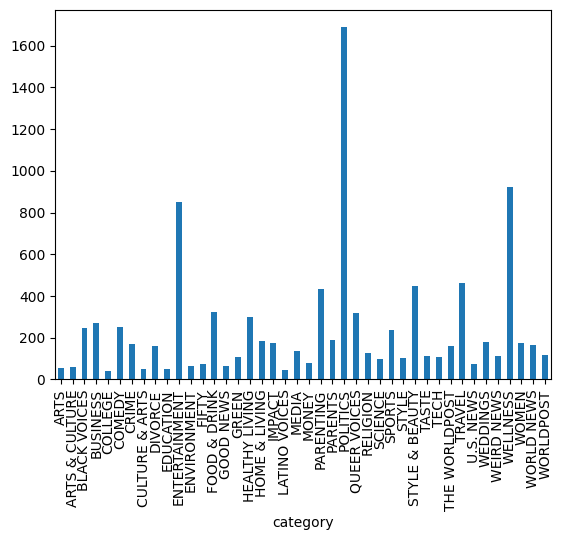

In [62]:
df_train.groupby("category").category_id.count().plot.bar(ylim=0)

In [63]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_train.headline).toarray()
labels = df_train.category_id

In [66]:
import numpy as np

for category, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]  # Access vocabulary directly
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]

    print(f"\n## '{category}':")
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams)))



## 'business':
  . Most correlated unigrams:
       . fitness
       . sleep
       . study
       . workout
       . health
       . yoga
       . fda
       . healthy
       . weight
       . cancer
  . Most correlated bigrams:
       . new year
       . weight loss
       . gps guide
       . prostate cancer
       . heart disease
       . lost weight
       . weekly meditations
       . healthy sex
       . meditations healthy
       . study suggests

## 'entertainment':
  . Most correlated unigrams:
       . isis
       . iraq
       . foreign
       . hamas
       . military
       . washington
       . asia
       . troops
       . cuba
       . battle
  . Most correlated bigrams:
       . week photos
       . hong kong
       . look day
       . north korea
       . 30 years
       . 10 things
       . old girl
       . year old
       . friday morning
       . gop senator

## 'politics':
  . Most correlated unigrams:
       . kids
       . mom
       . parenting
       . pare